In [1]:
import pandas as pd
from pathlib import Path

import math

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks')



from tb_to_csv import tabulate_metrics
from plot_fcts import curve_plot, multi_metric_bar_plot

In [2]:
data_names = ["TSD_15k_each_6trees_IDs" ,
"TSD_15k_each_6trees_charge" ,
"TSD_15k_each_6trees_IDs_charge" ,
"TSD_15k_each_6trees_only4mom" ]

#["50k_realTree_IDs","50k_realTree_clean",'50k_realTree_IDs_charge',"50k_realTree_charge"]
specs = ["512_0.001_128_0.3_8","512_0.001_128_0.3_10","512_0.001_128_0.3_12",
        "1024_0.001_128_0.3_8","1024_0.001_128_0.3_10","1024_0.001_128_0.3_12"]

Converting run events.out.tfevents.1623381745.batchg009.desy.de.46232.0

- Done
151
0
1
Converting run events.out.tfevents.1623381745.batchg007.desy.de.25632.0

- Done
151
0
1
Converting run events.out.tfevents.1623381742.batchg013.desy.de.4119.0

- Done
151
0
1
Converting run events.out.tfevents.1623395878.batchg001.desy.de.180114.0

- Done
70
0
1
Converting run events.out.tfevents.1623395908.batchg006.desy.de.239461.0

- Done
60
0
1
Converting run events.out.tfevents.1623395911.batchg002.desy.de.111367.0

- Done
51
0
1
Converting run events.out.tfevents.1623356776.batchg003.desy.de.155507.0

- Done
206
0
1


/afs/desy.de/user/a/axelheim/private/run_BaumBauenNotebooks/plot_fcts.py:82: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  name=plt.figure(figsize=(16,10))#figsize=(3.487,3.487/1.618))


Converting run events.out.tfevents.1623357296.batchg012.desy.de.15898.0

- Done
214
0
1
Converting run events.out.tfevents.1623359852.batchg006.desy.de.47480.0

- Done
149
0
1
Converting run events.out.tfevents.1623381708.batchg008.desy.de.10443.0

- Done
70
0
1
Converting run events.out.tfevents.1623381709.batchg011.desy.de.19710.0

- Done
84
0
1
Converting run events.out.tfevents.1623381746.batchg005.desy.de.20706.0

- Done
48
0
1
Converting run events.out.tfevents.1623324567.batchg011.desy.de.77735.0

- Done
151
0
1
Converting run events.out.tfevents.1623331852.batchg012.desy.de.62052.0

- Done
151
0
1
Converting run events.out.tfevents.1623341297.batchg007.desy.de.34582.0

- Done
143
0
1
Converting run events.out.tfevents.1623345672.batchg011.desy.de.8991.0

- Done
104
0
1
Converting run events.out.tfevents.1623351316.batchg001.desy.de.72570.0

- Done
57
0
1
Converting run events.out.tfevents.1623355648.batchg002.desy.de.156078.0

- Done
51
0
1
Converting run events.out.tfevents.16

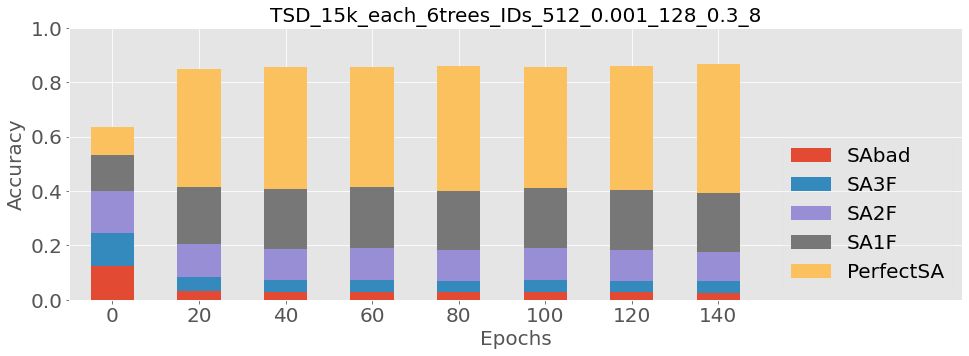

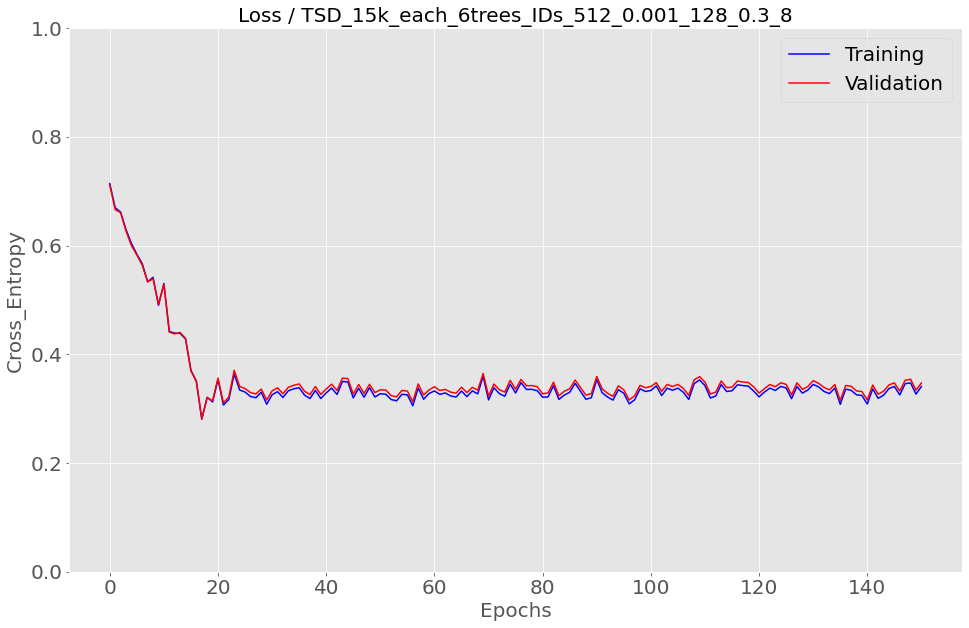

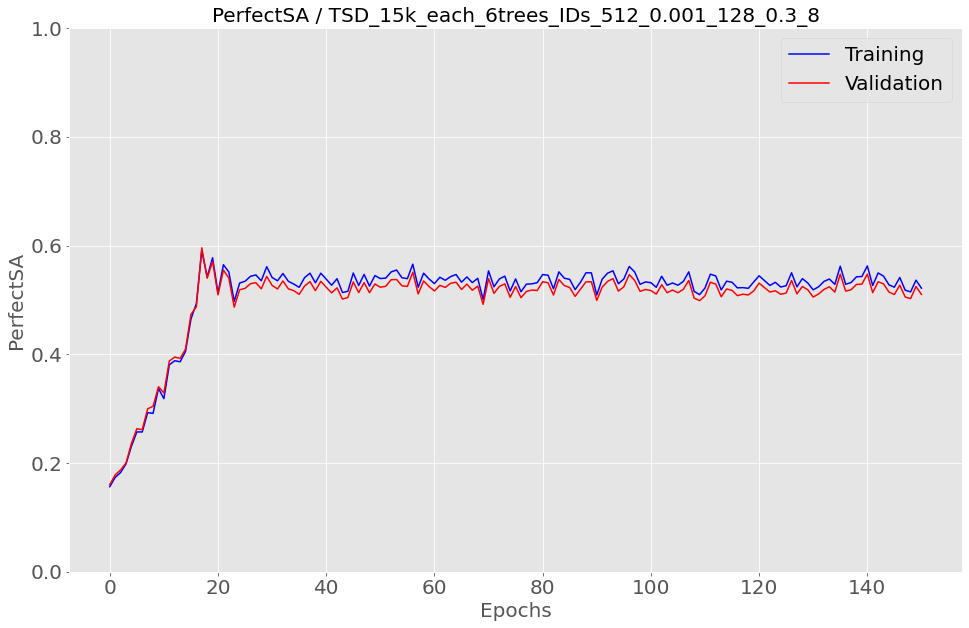

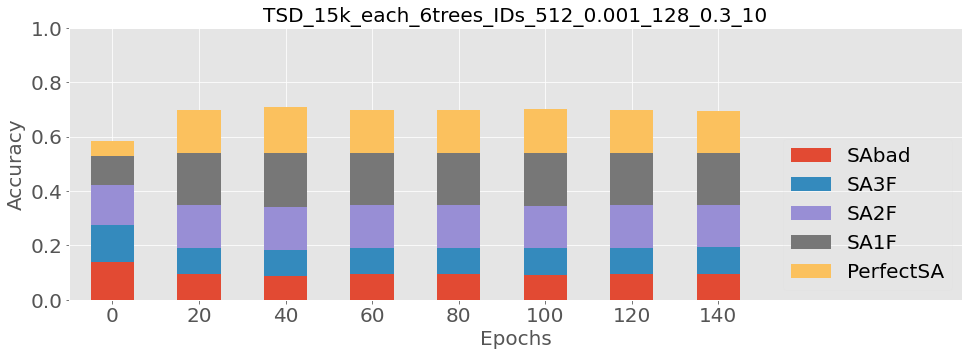

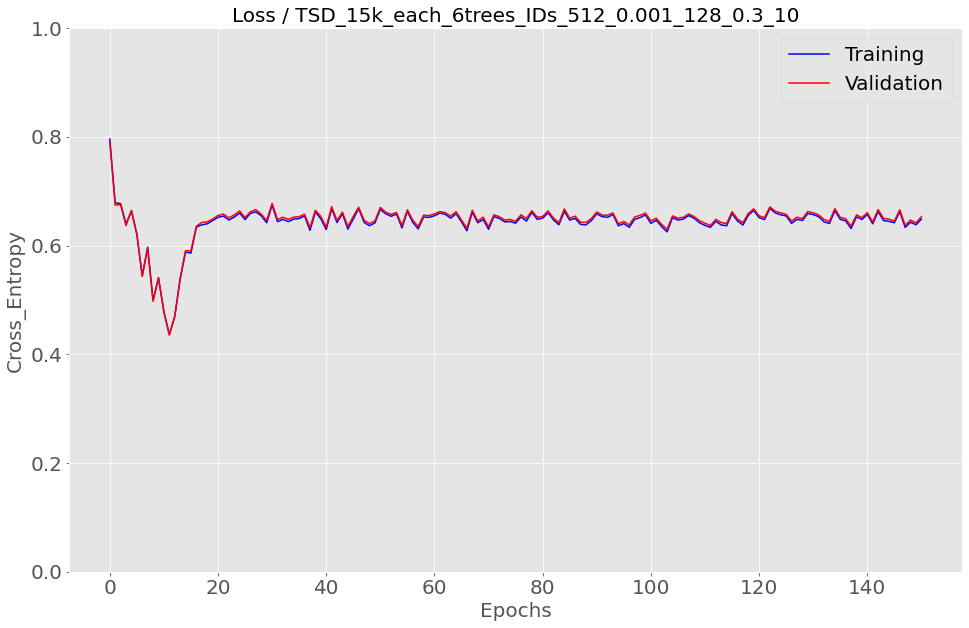

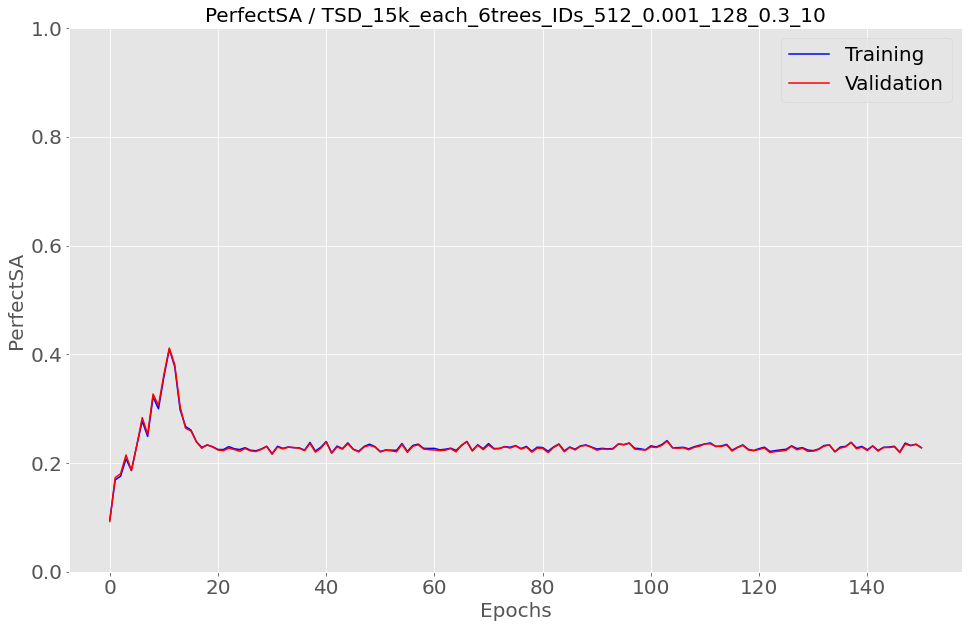

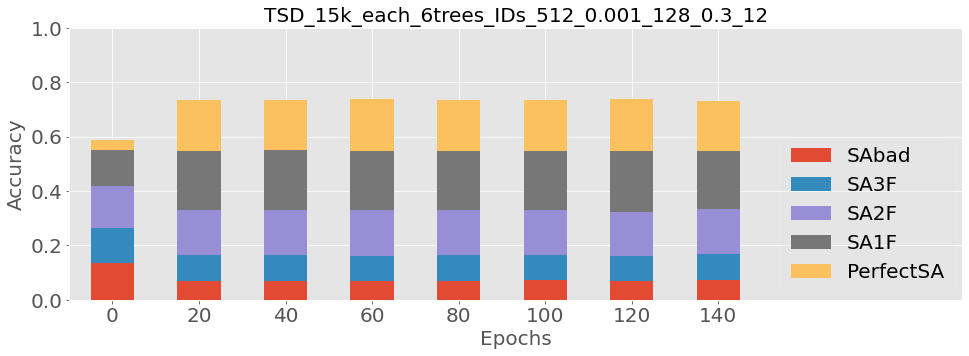

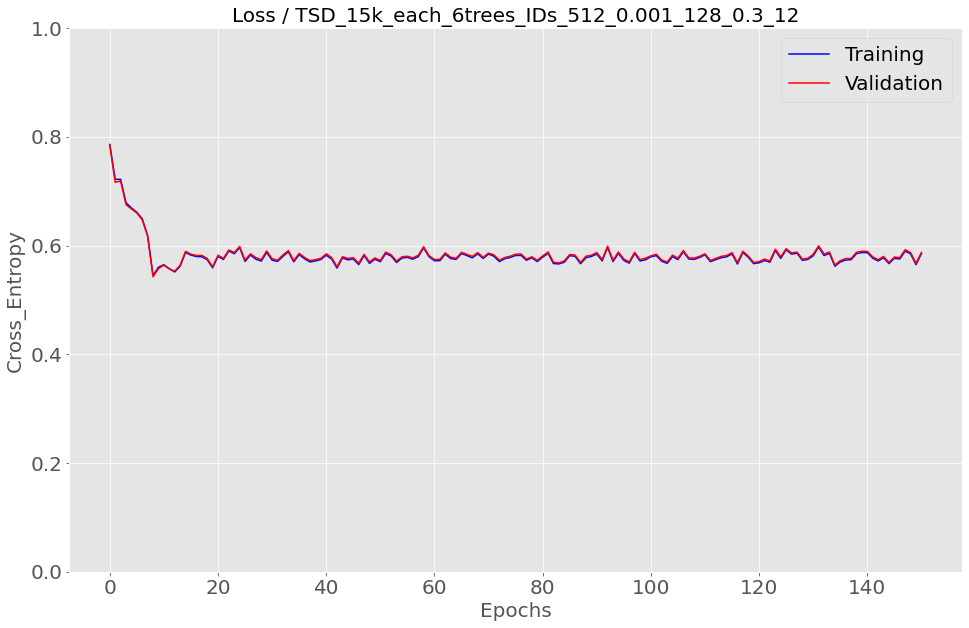

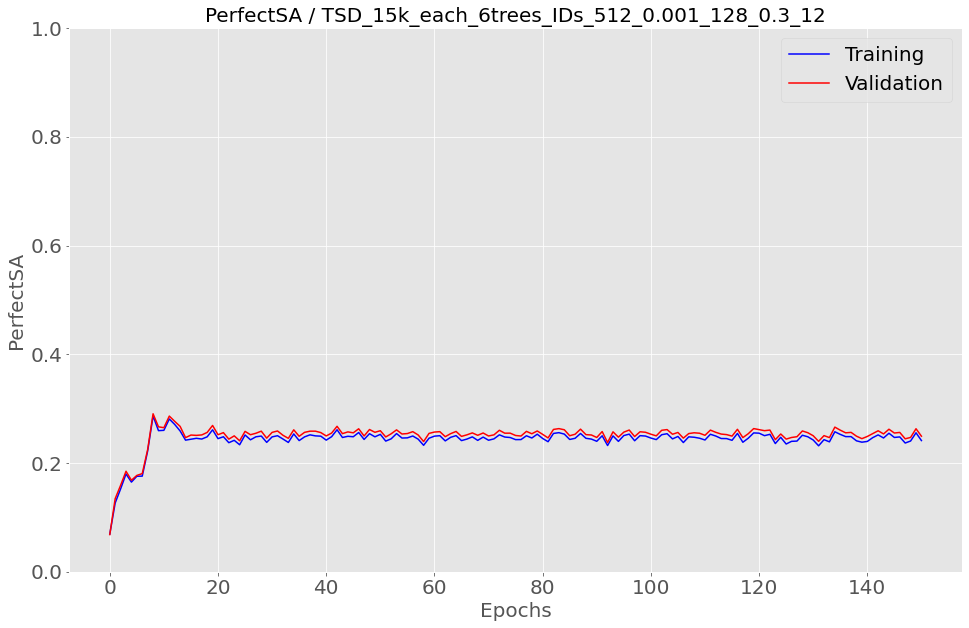

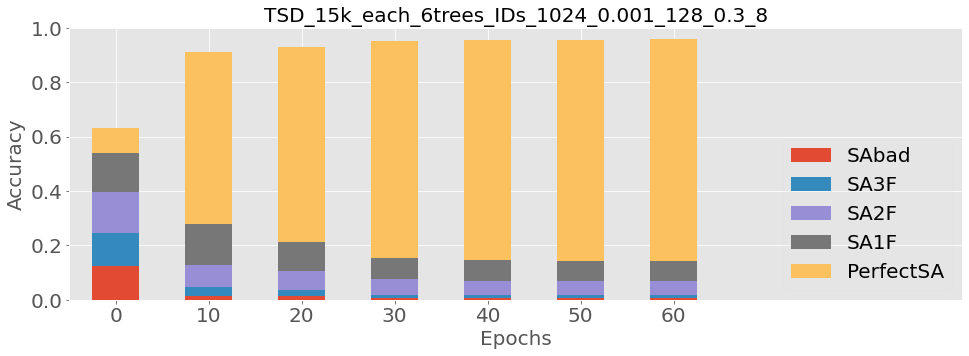

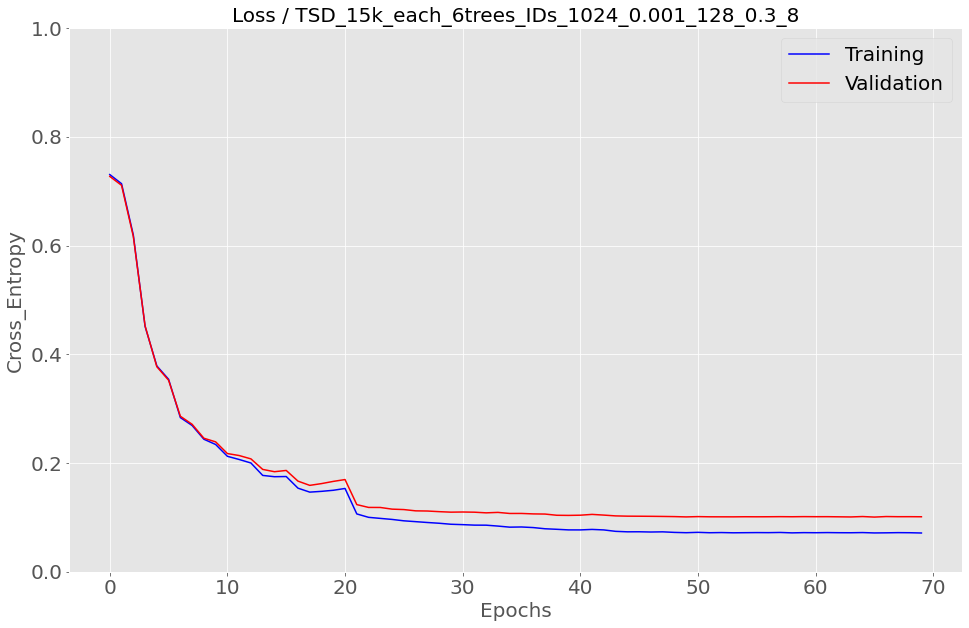

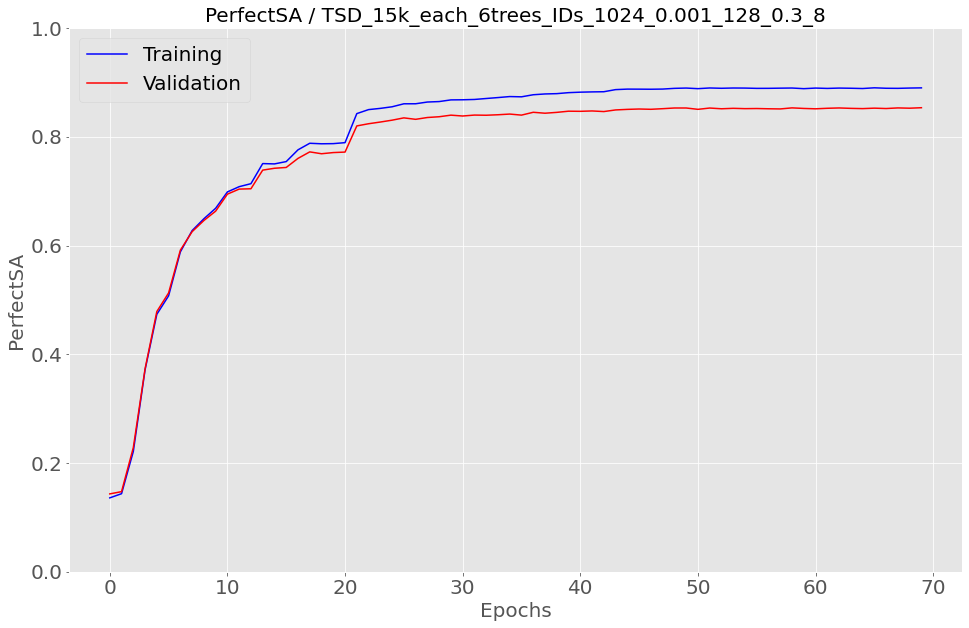

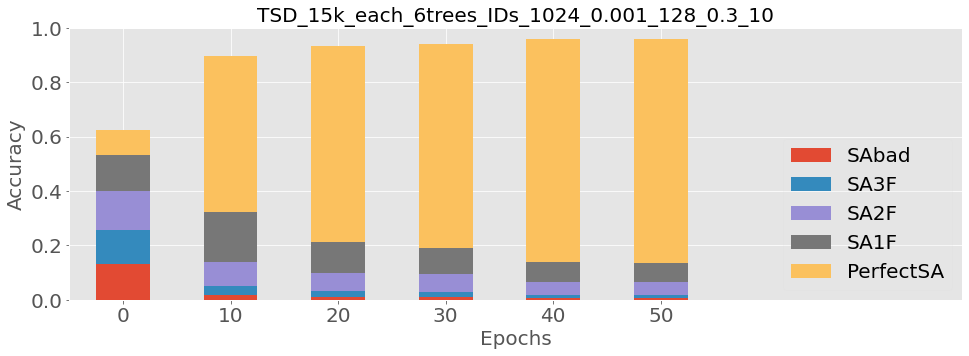

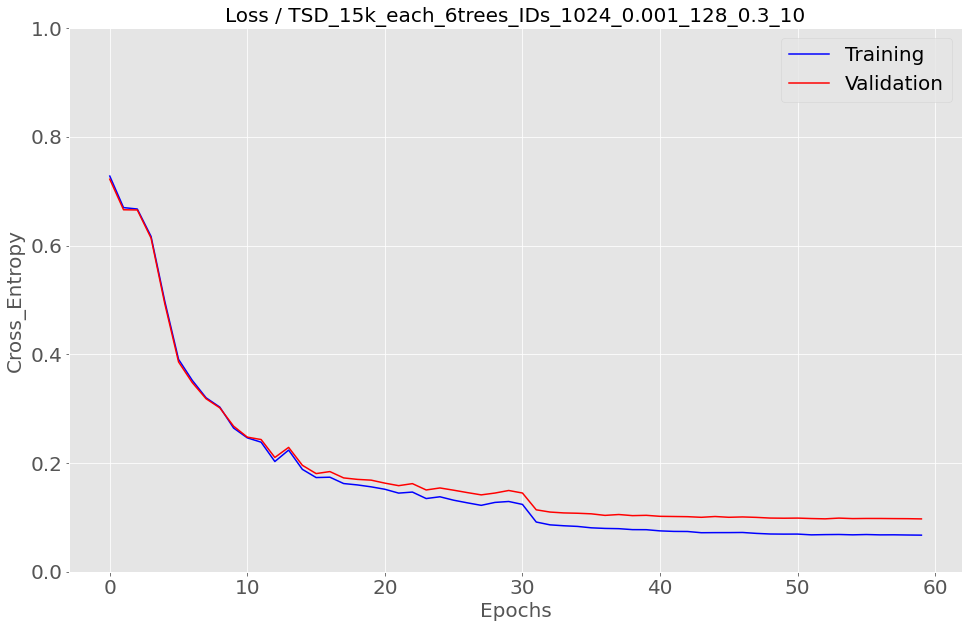

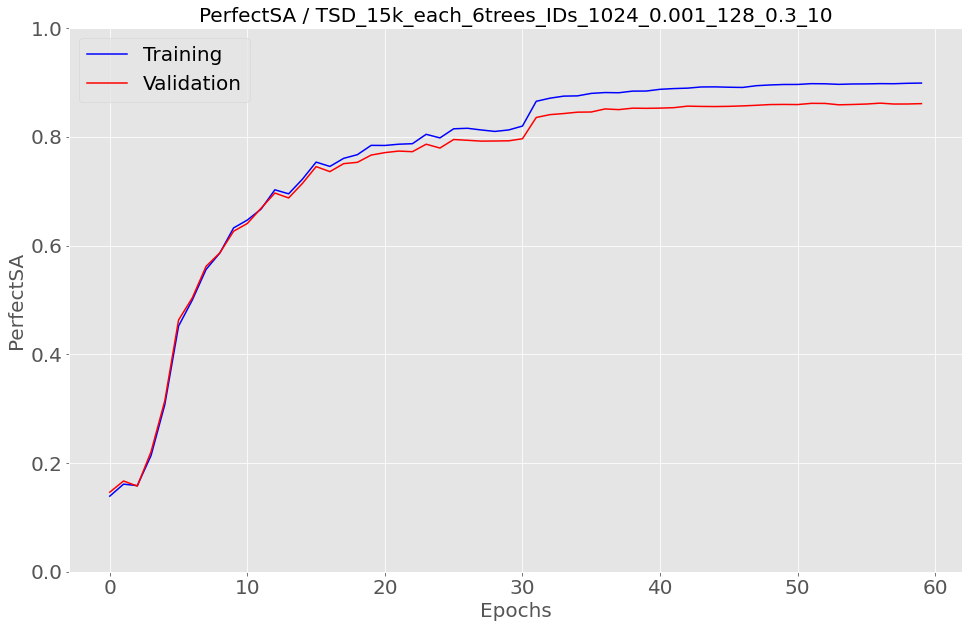

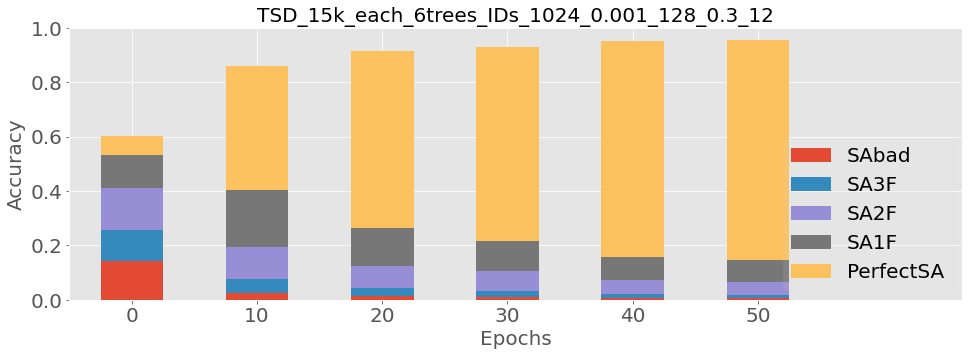

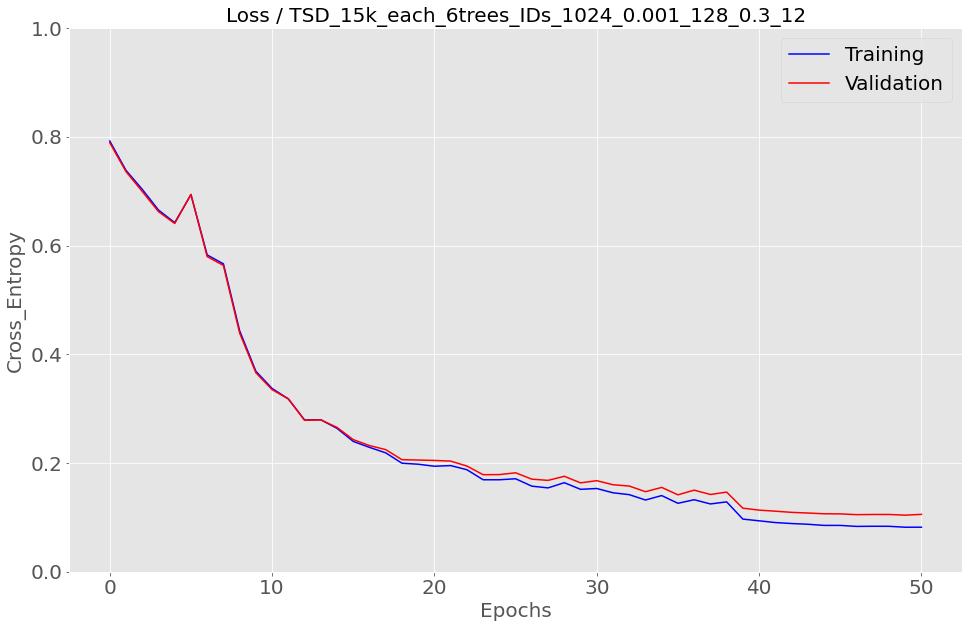

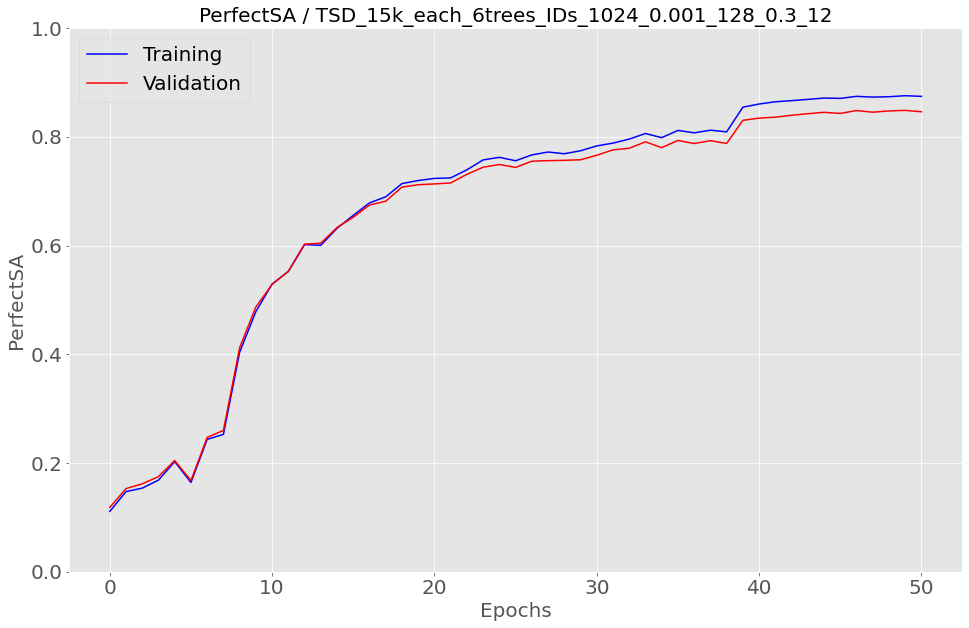

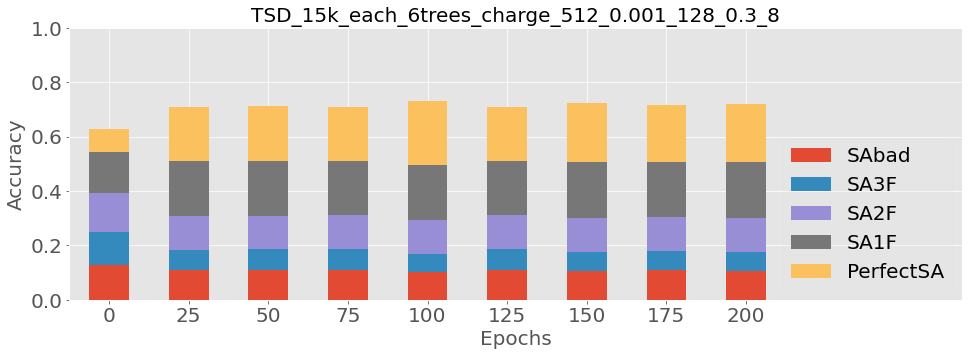

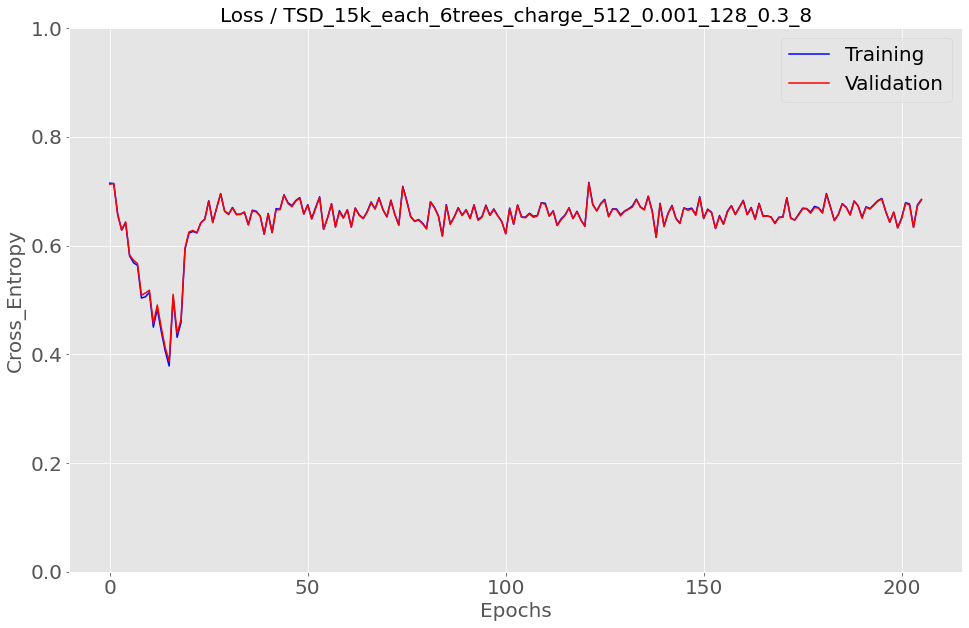

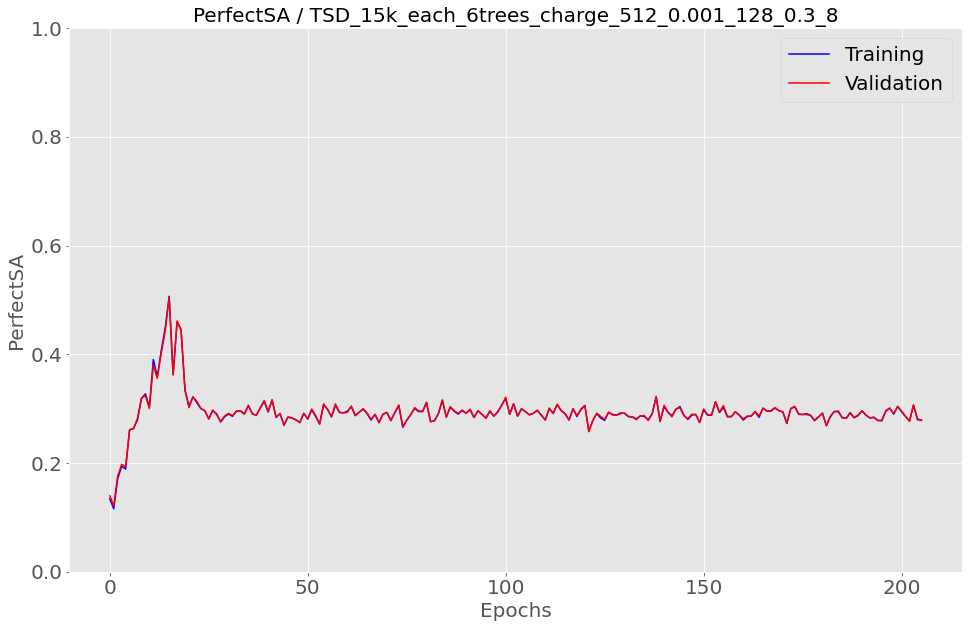

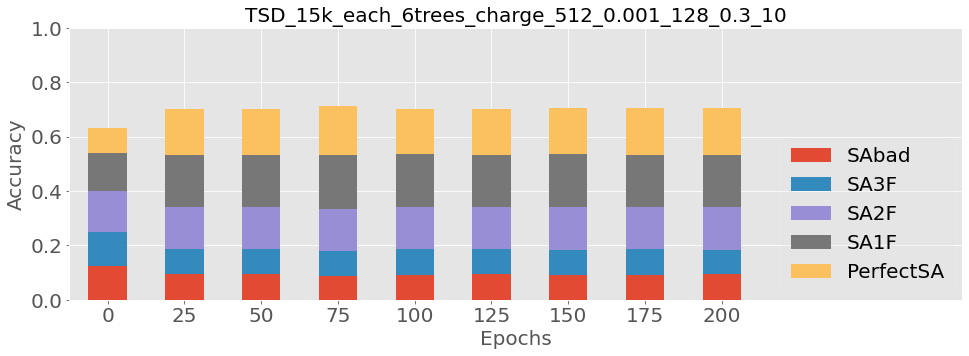

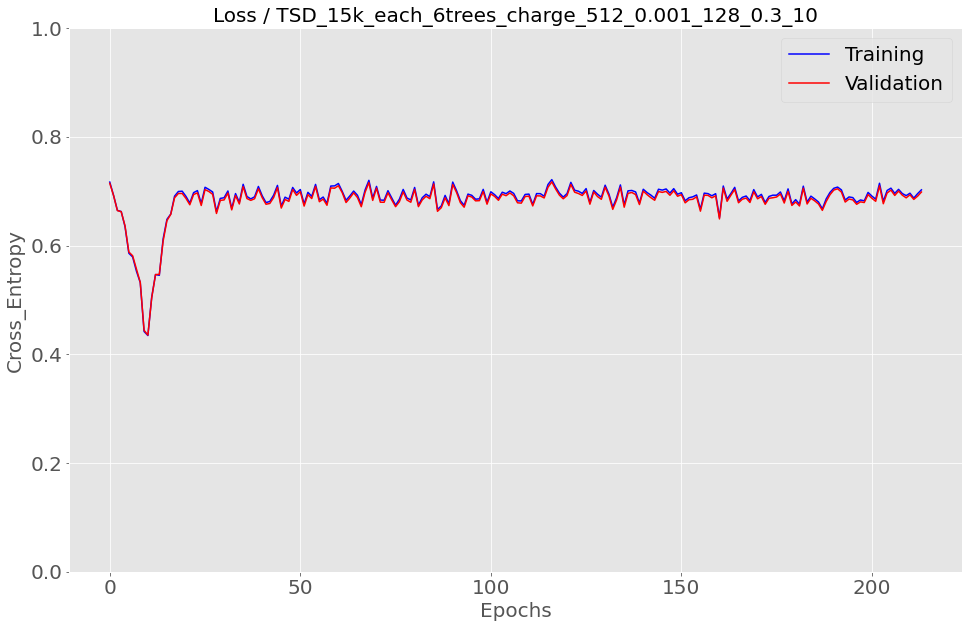

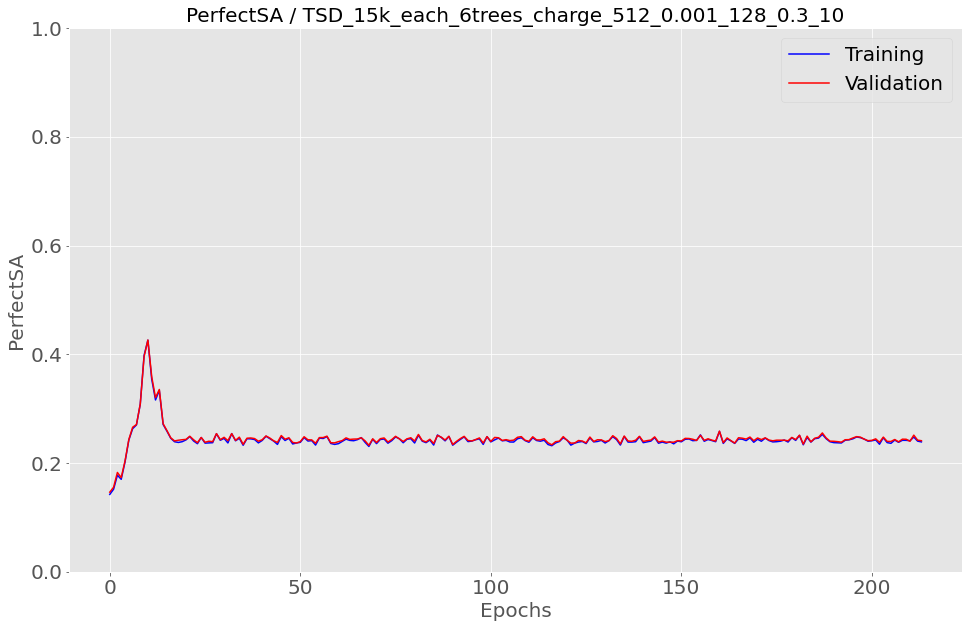

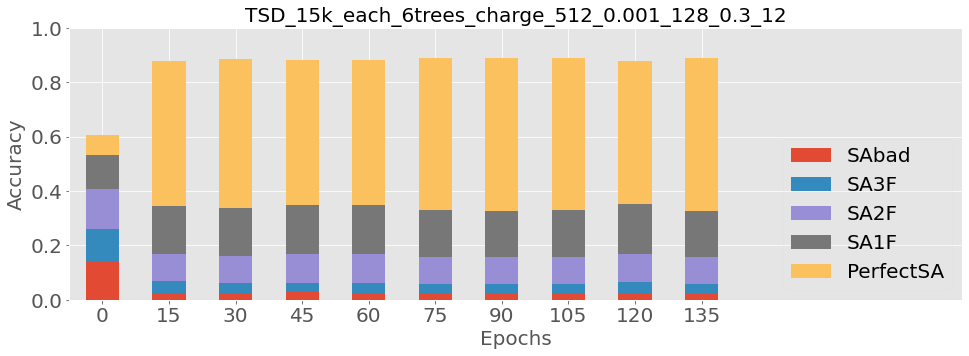

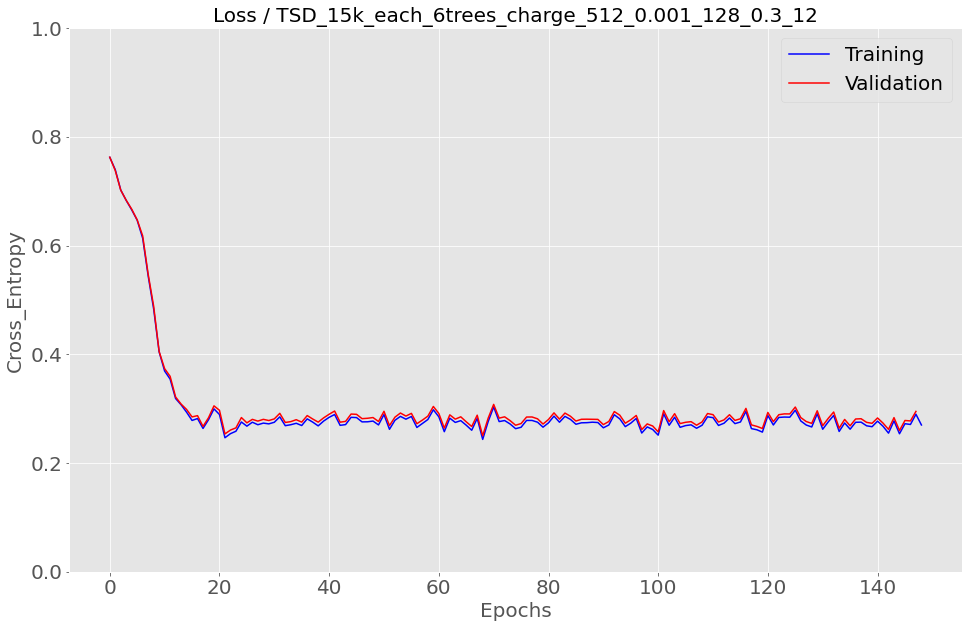

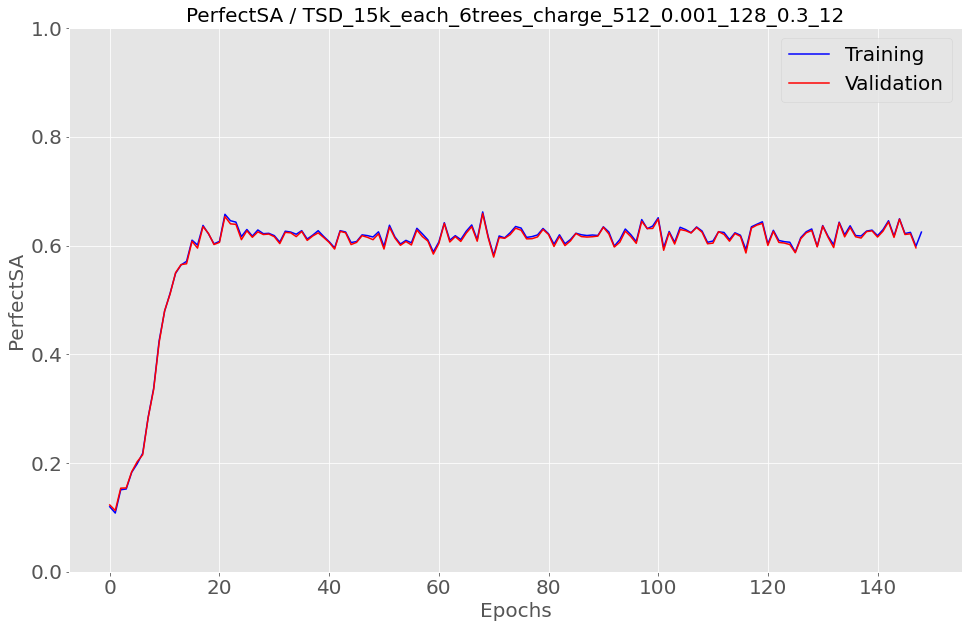

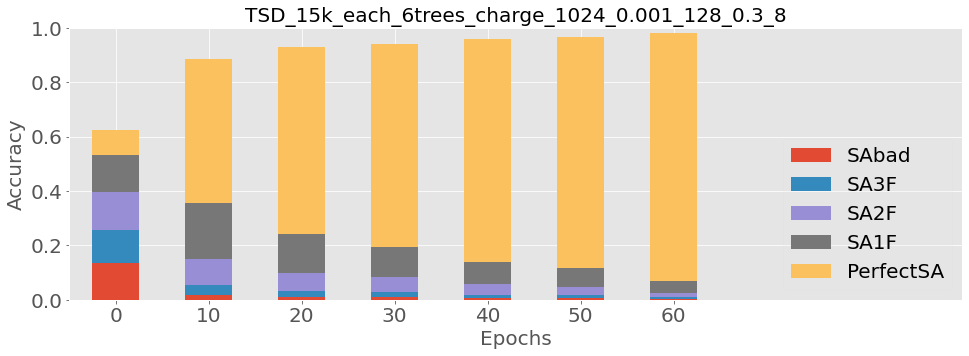

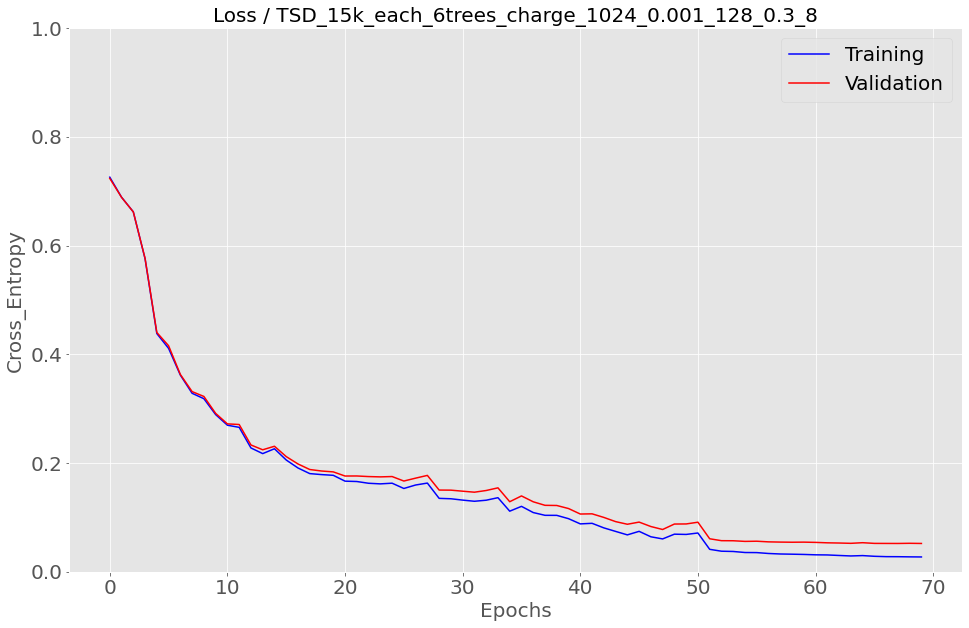

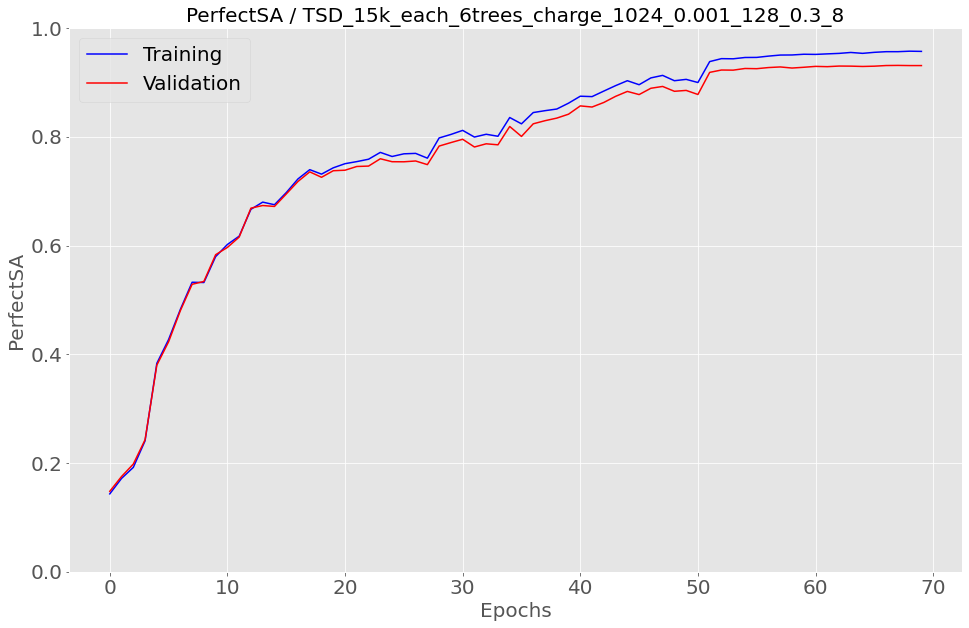

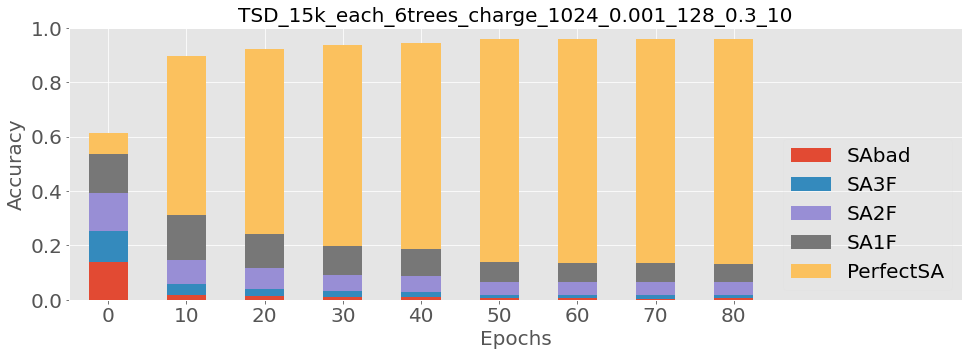

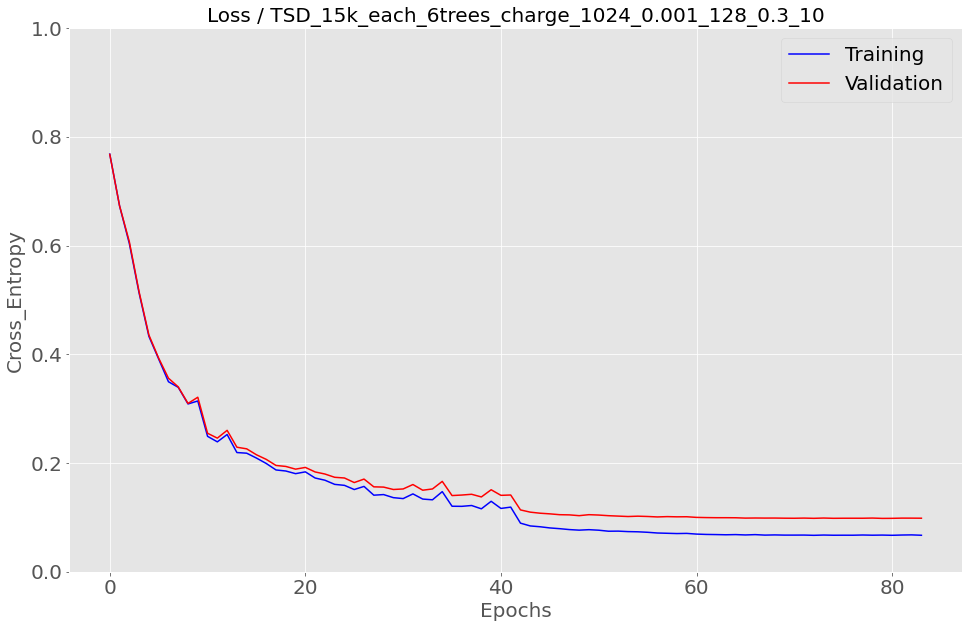

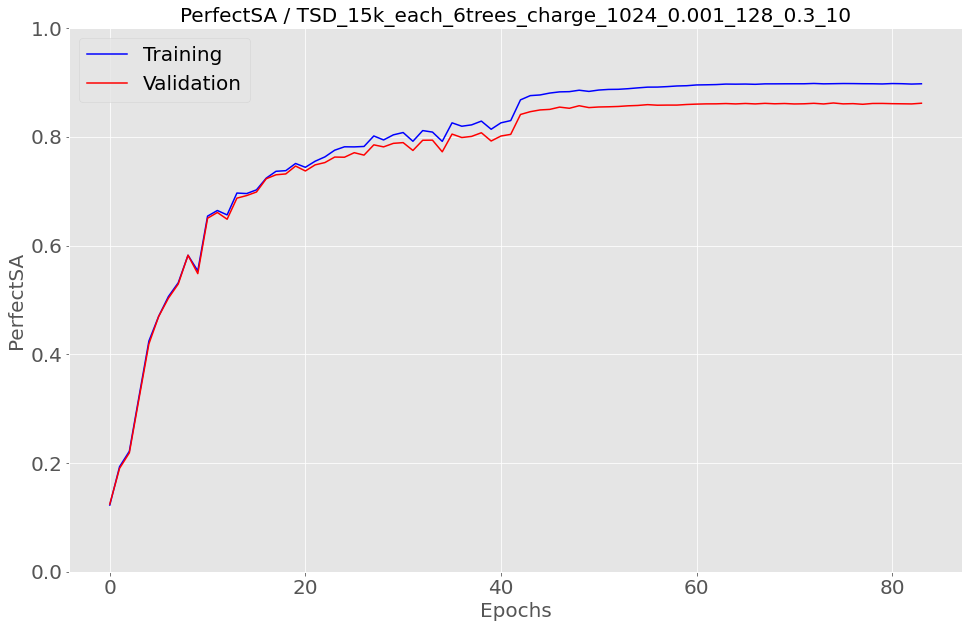

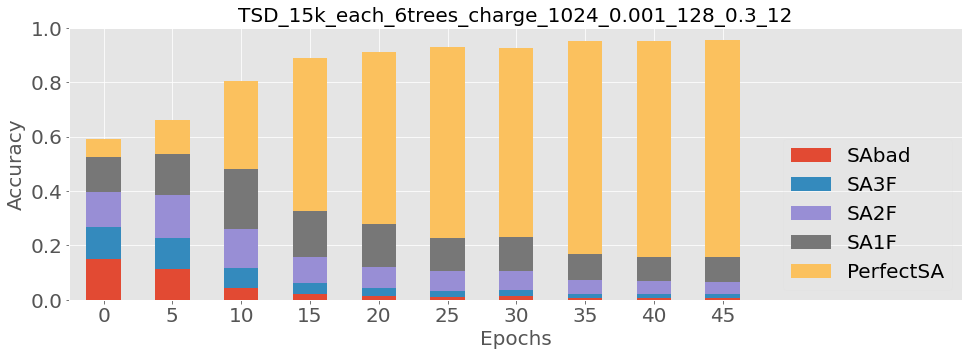

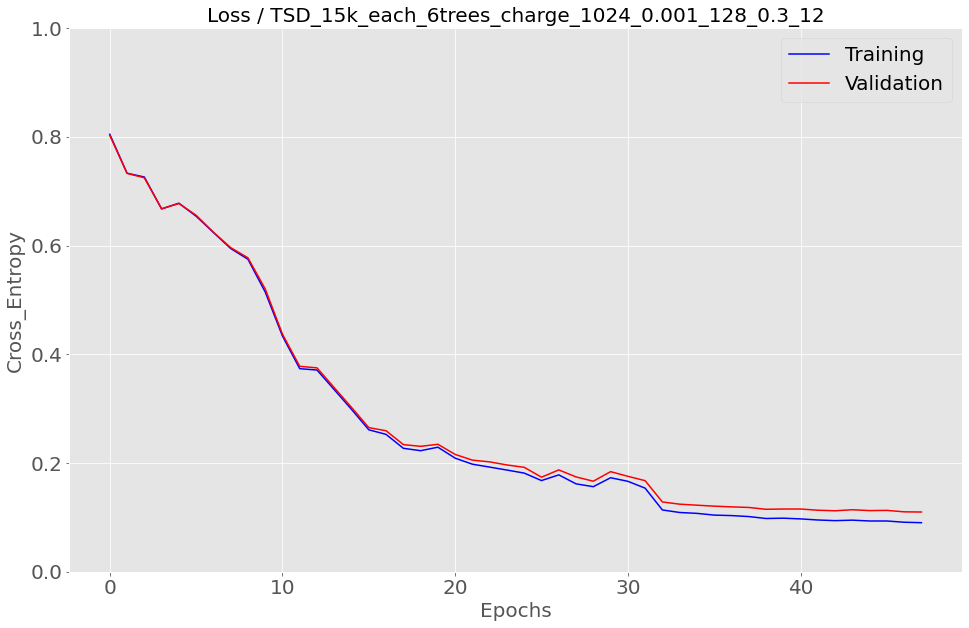

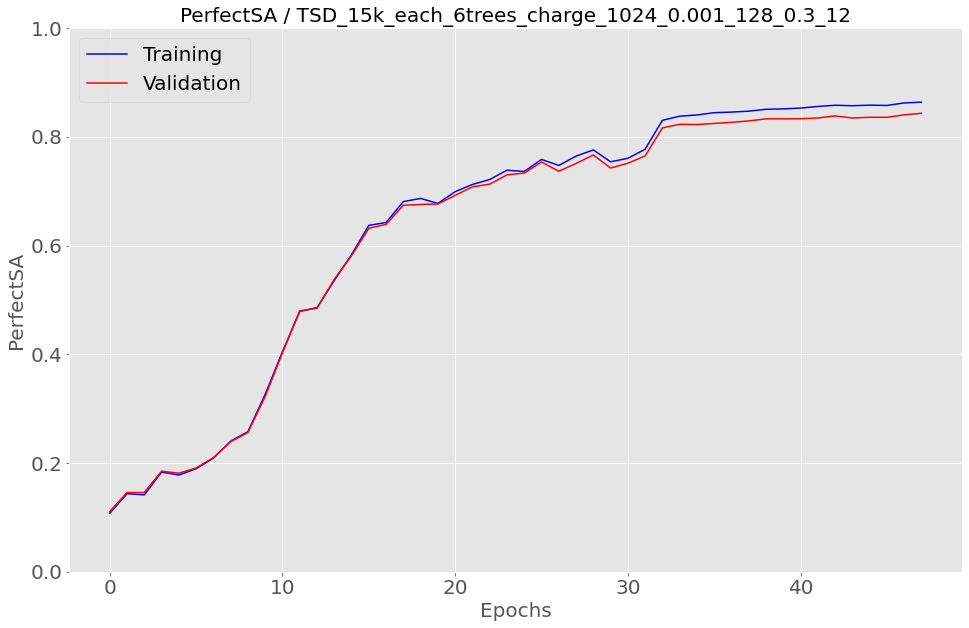

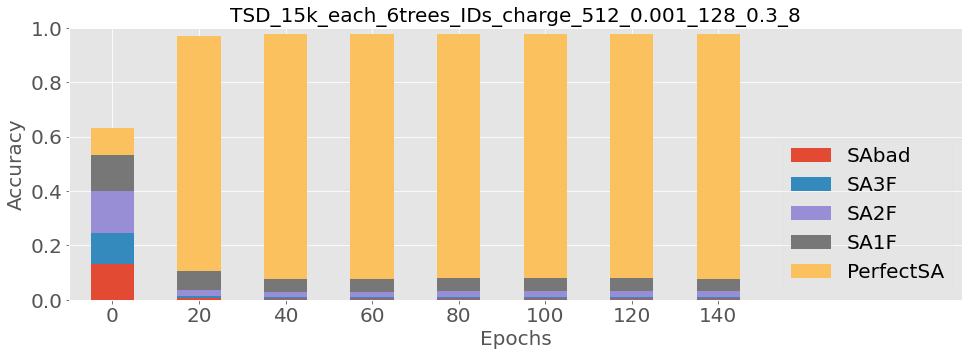

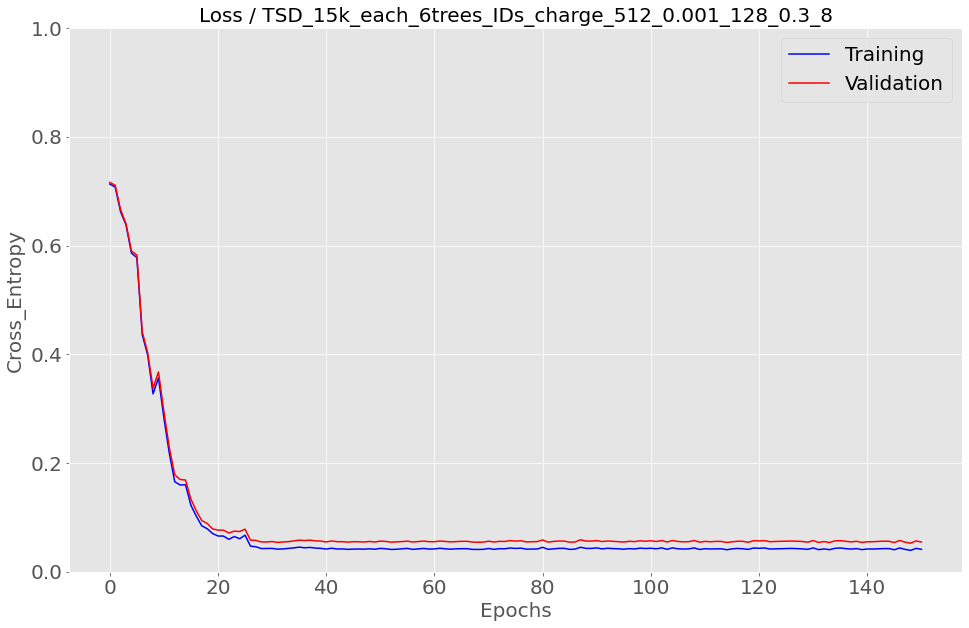

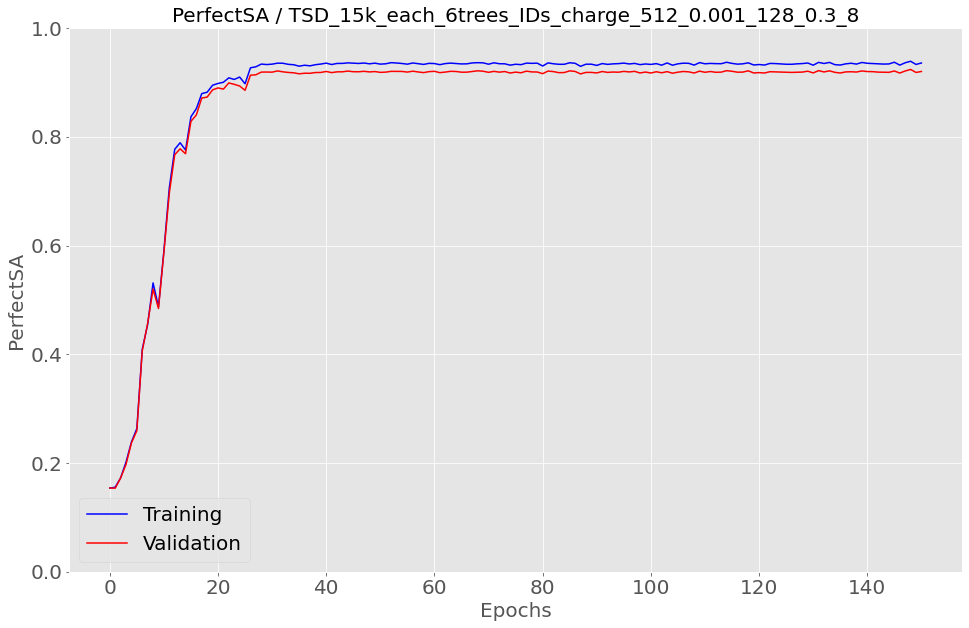

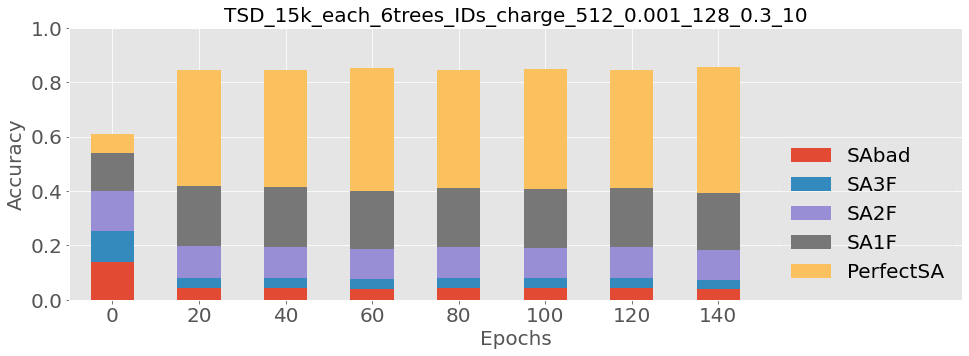

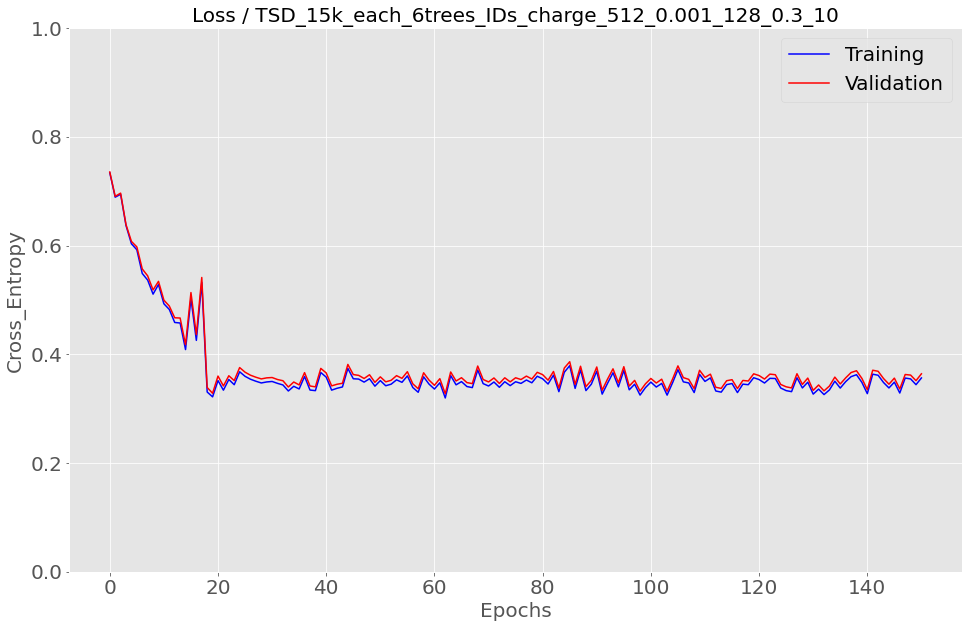

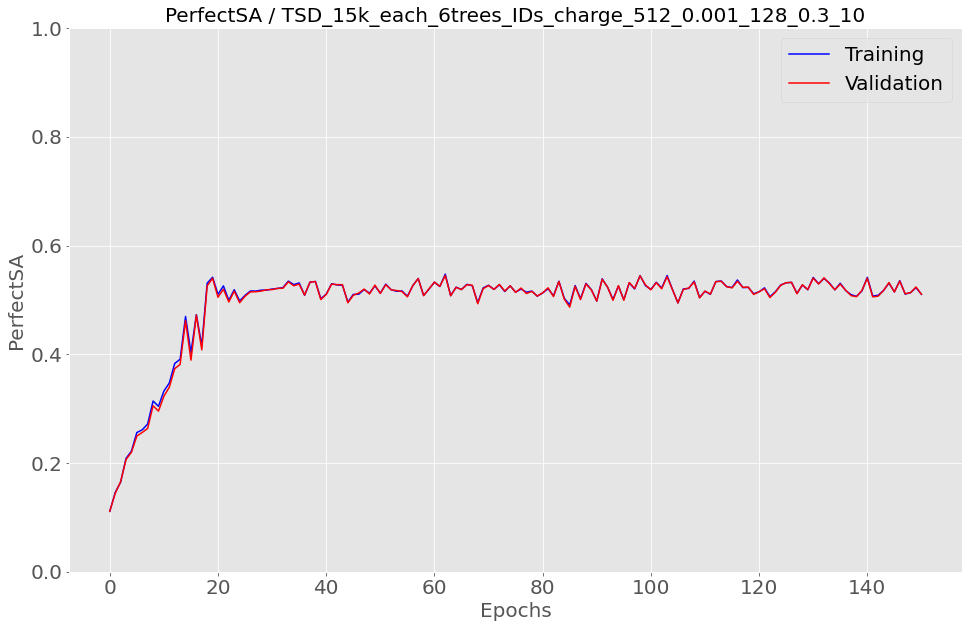

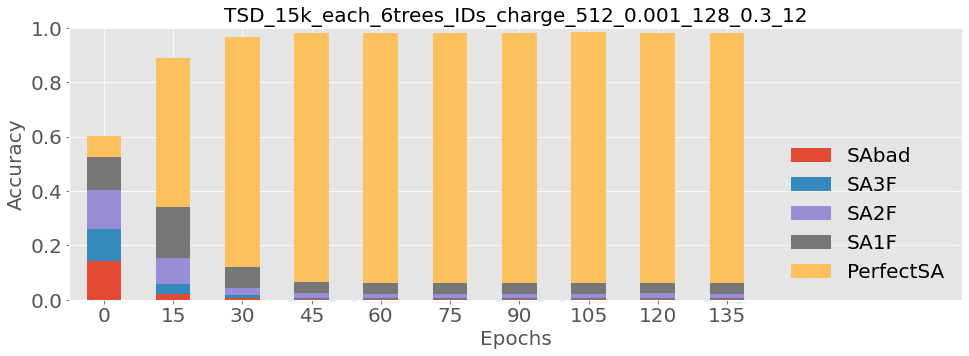

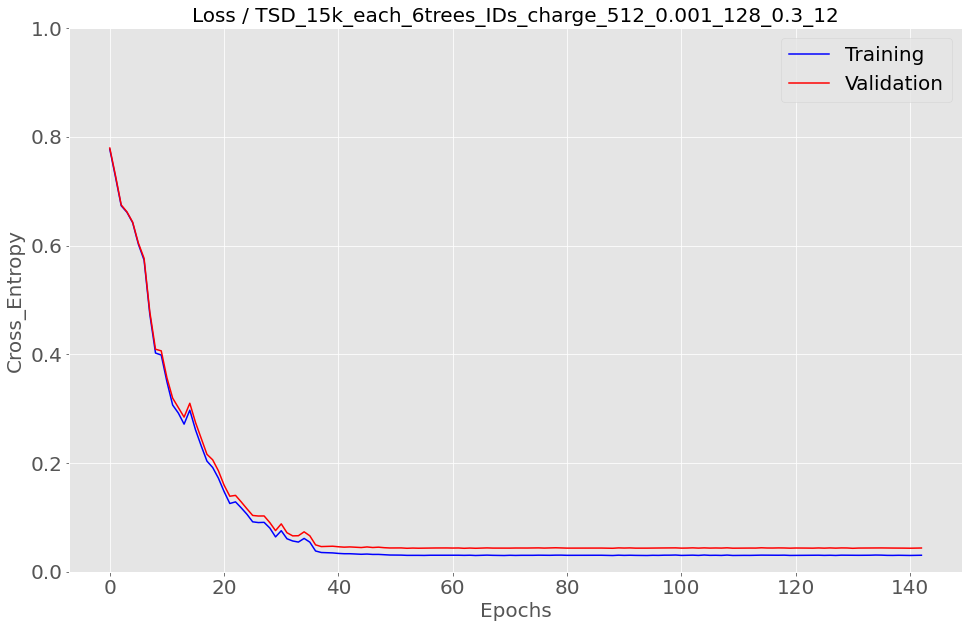

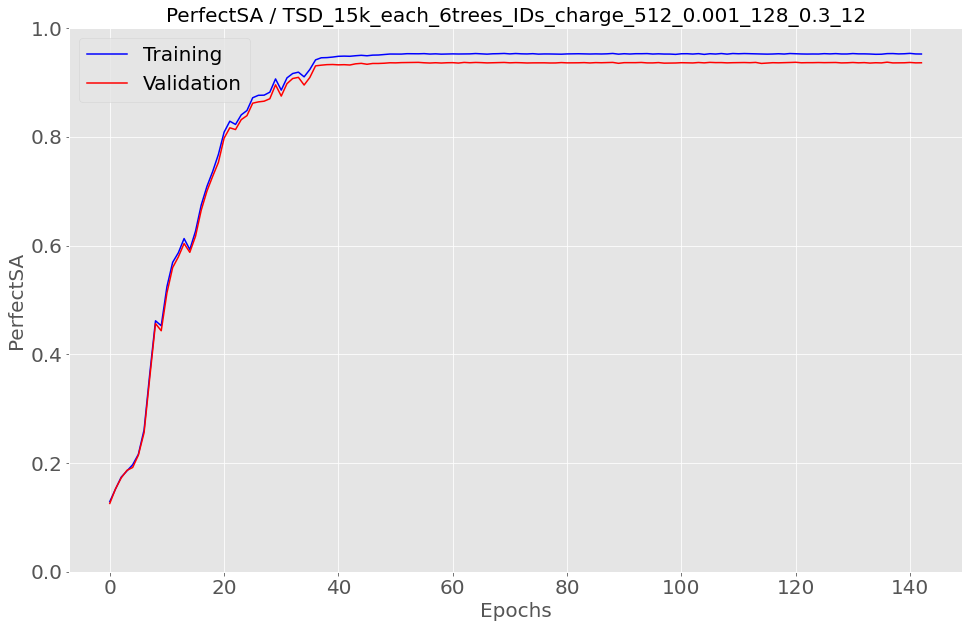

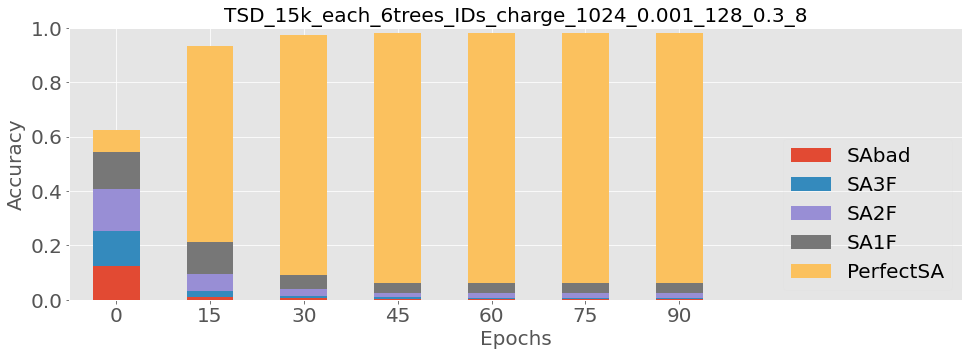

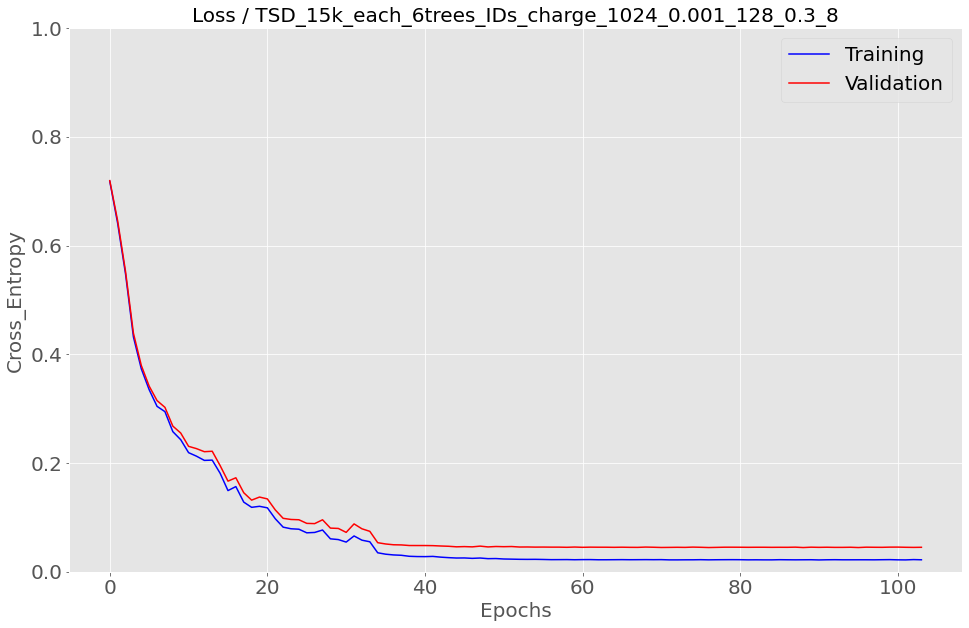

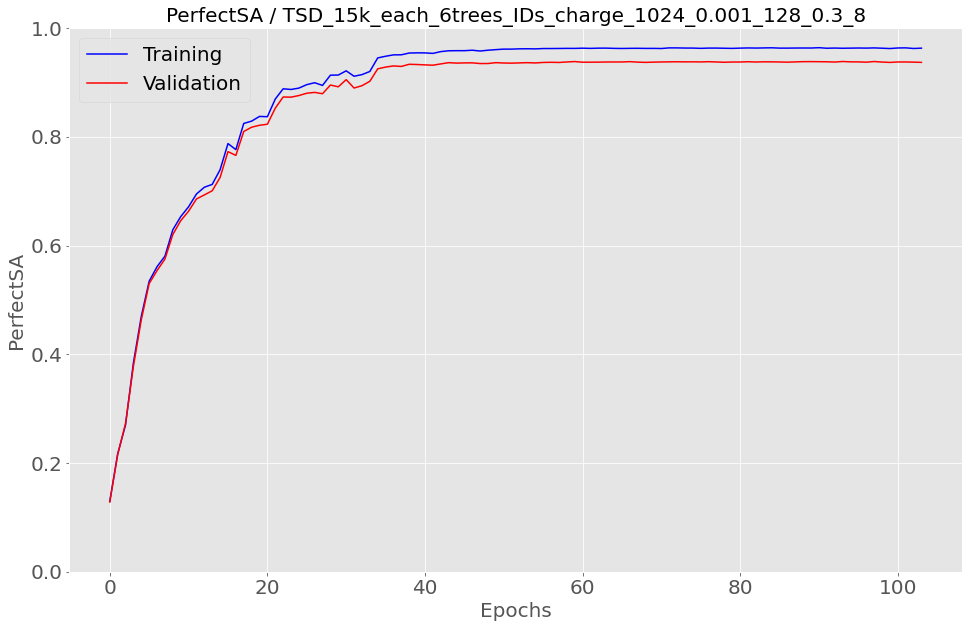

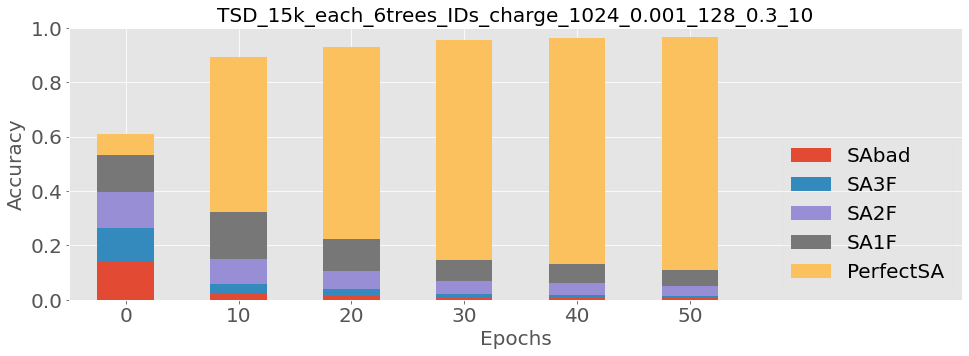

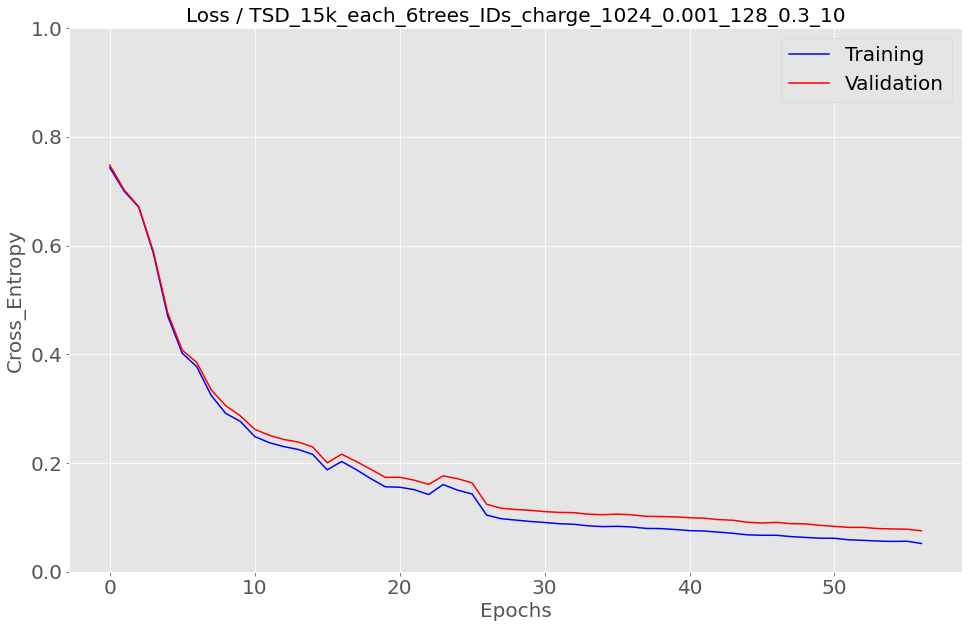

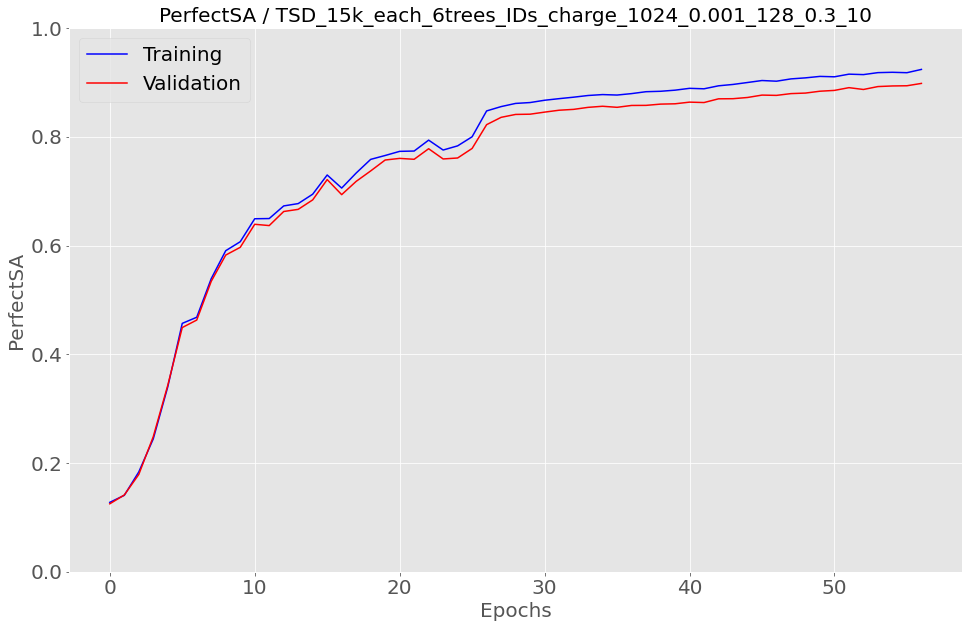

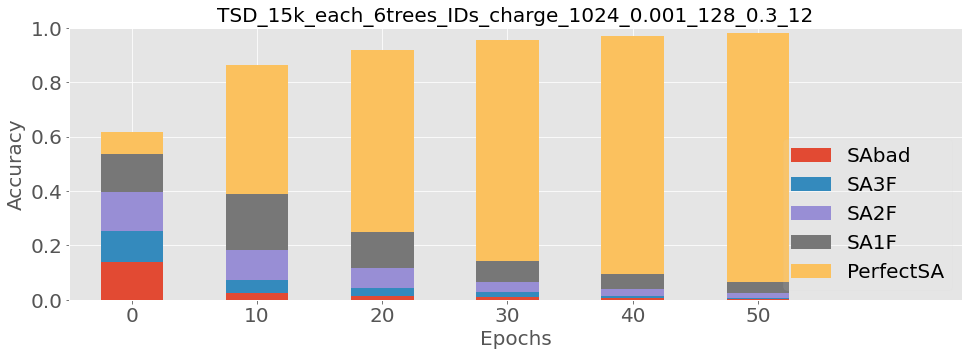

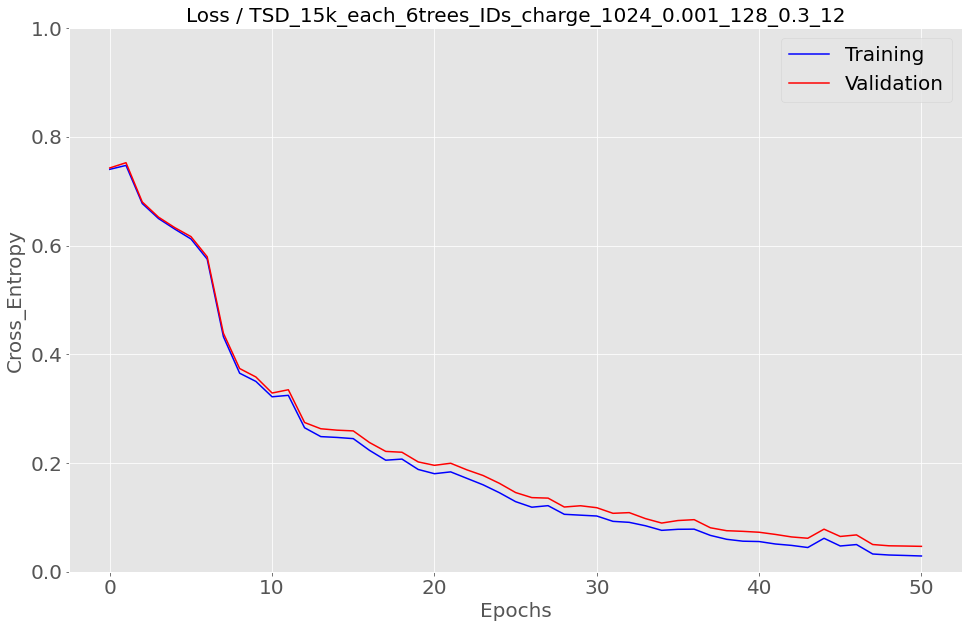

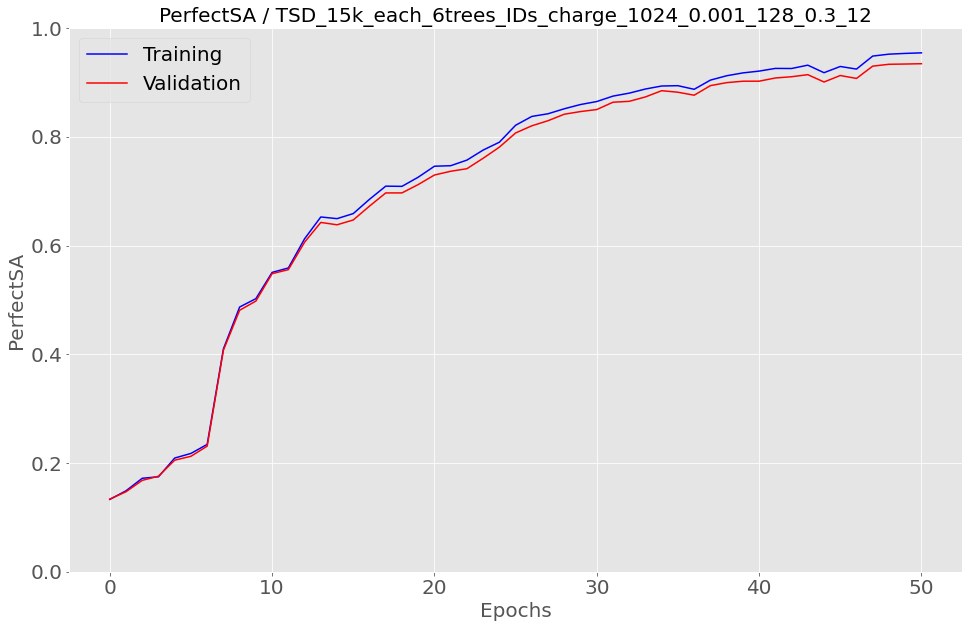

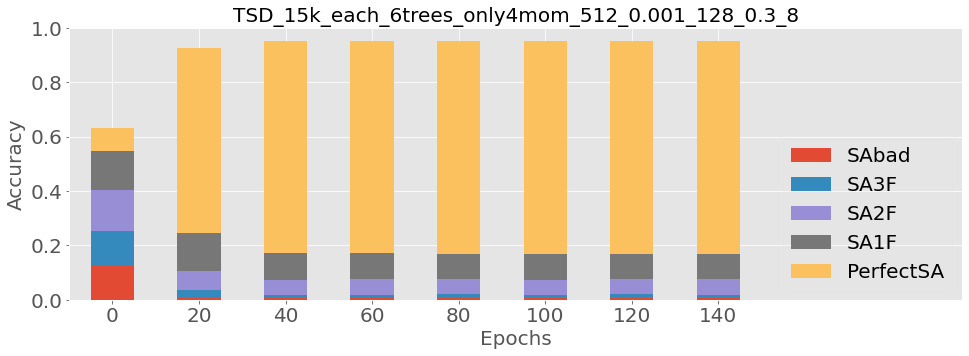

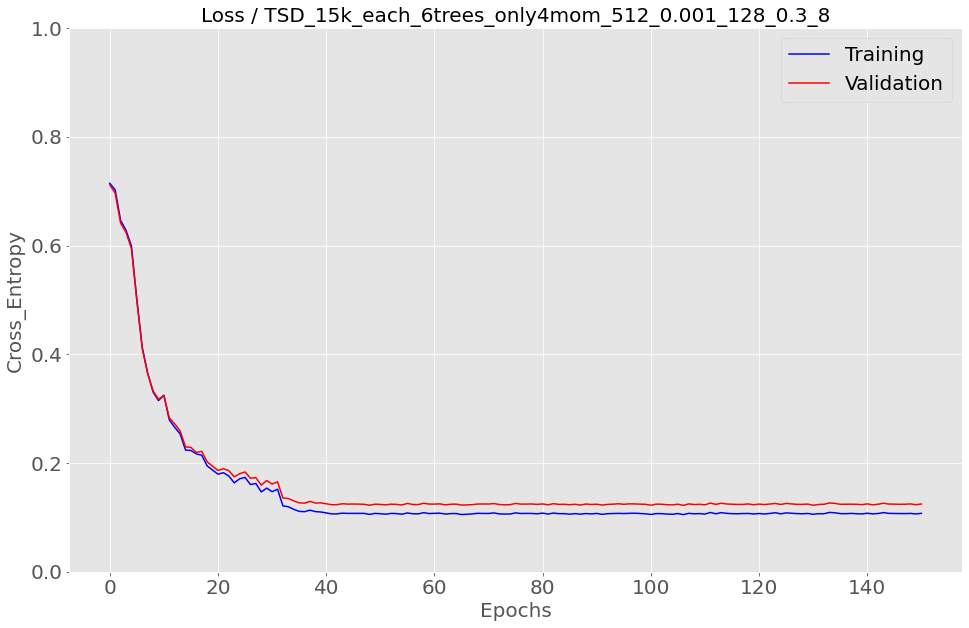

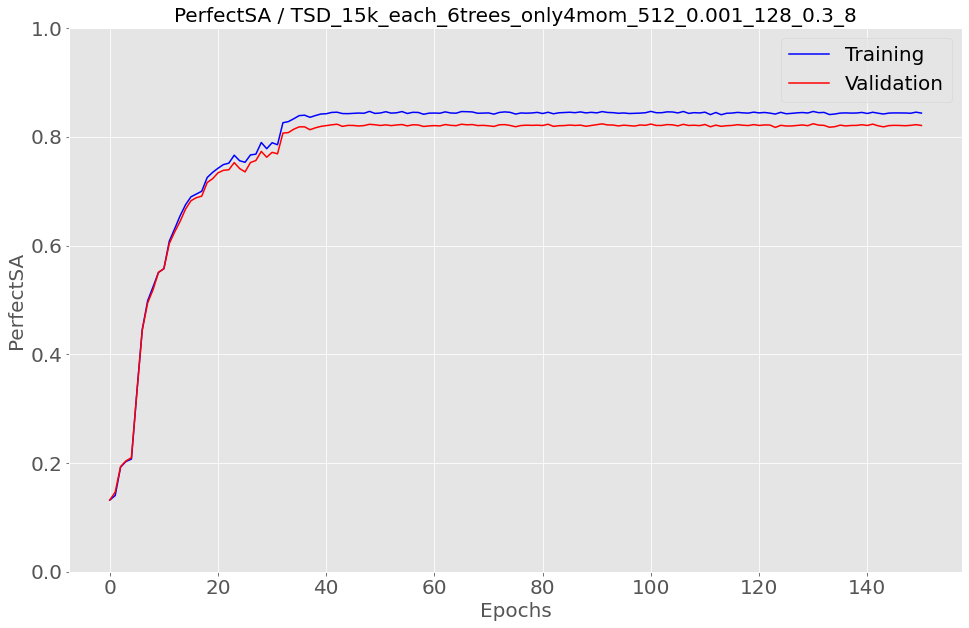

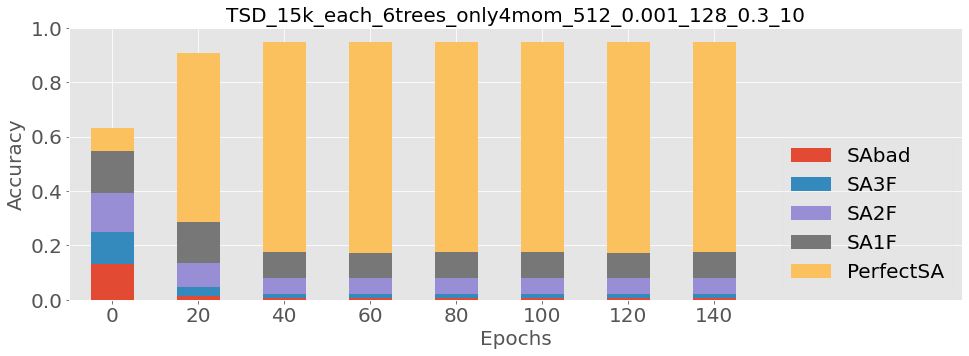

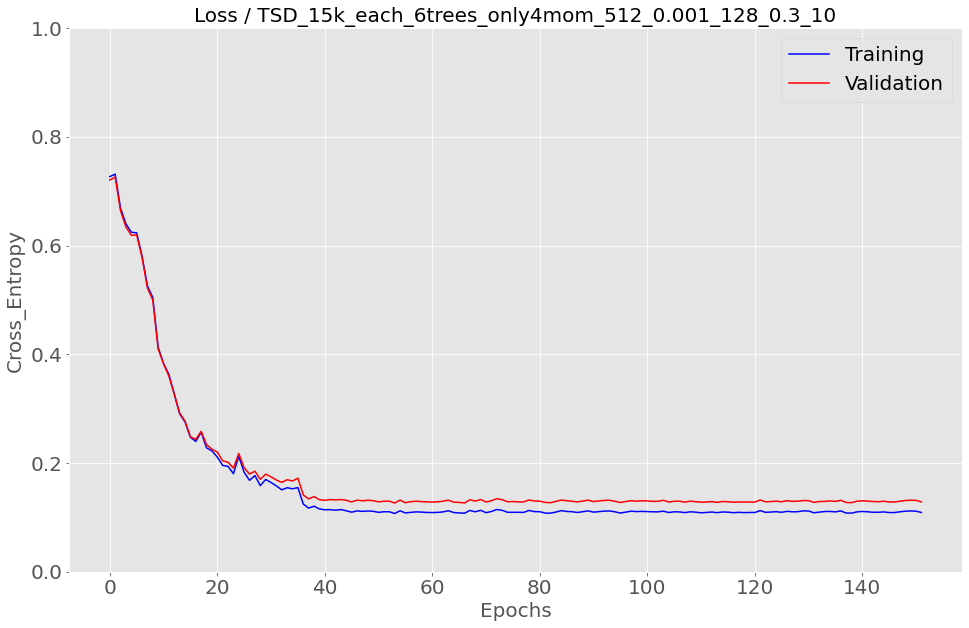

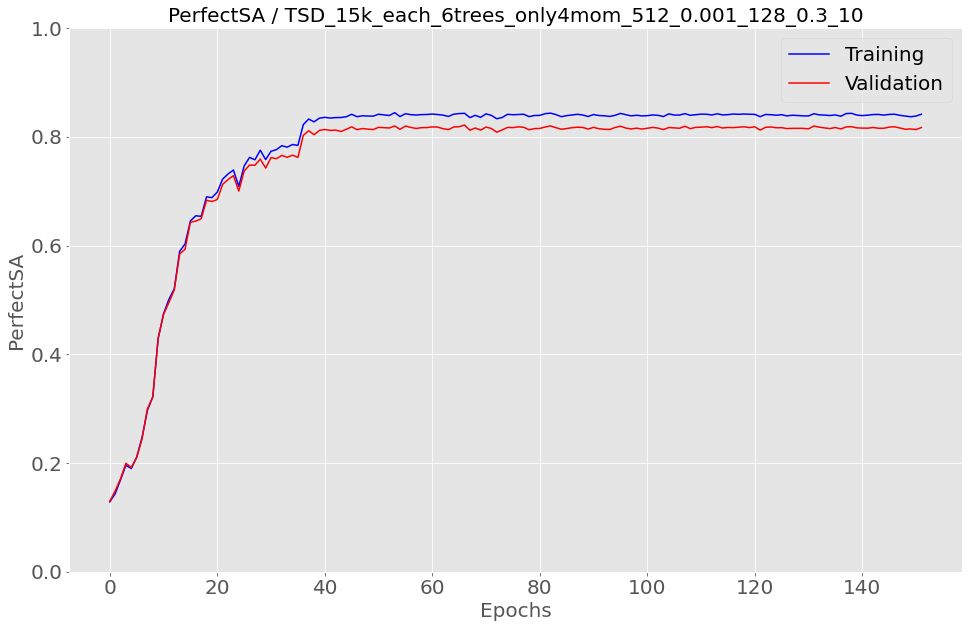

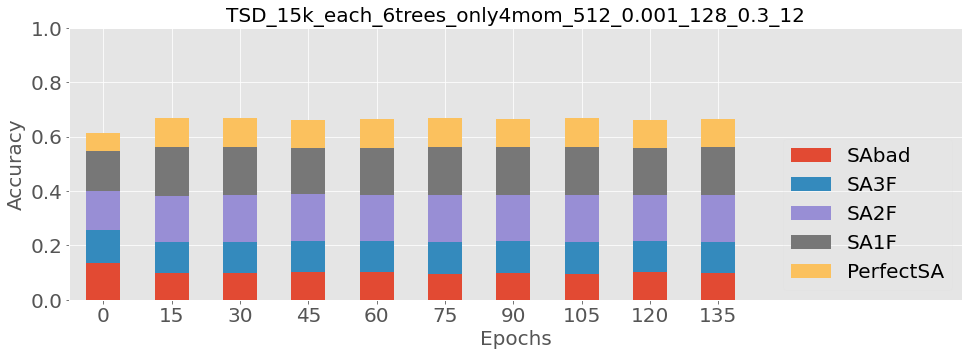

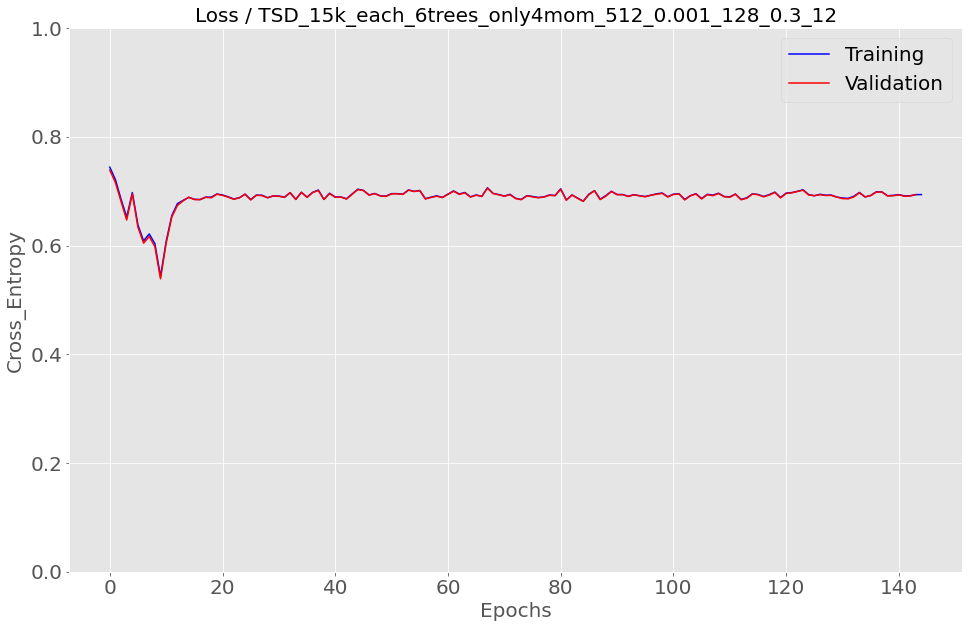

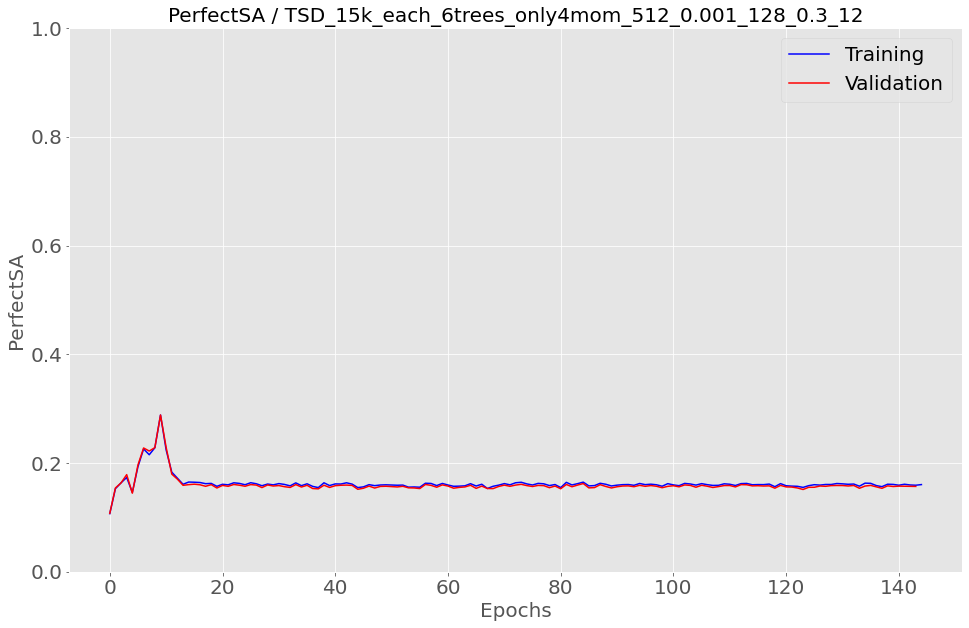

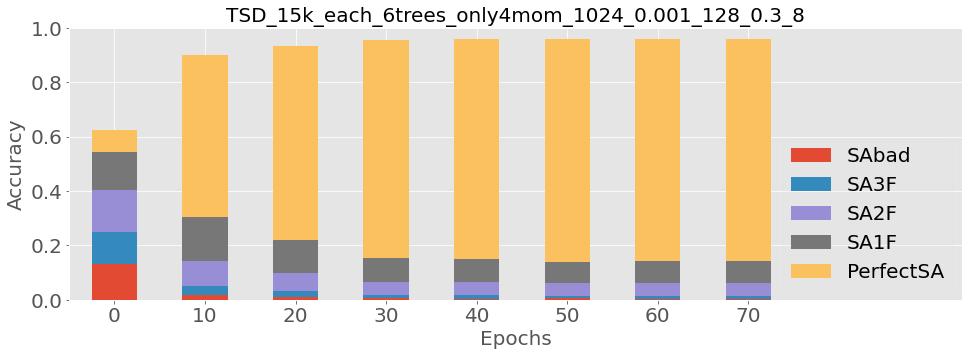

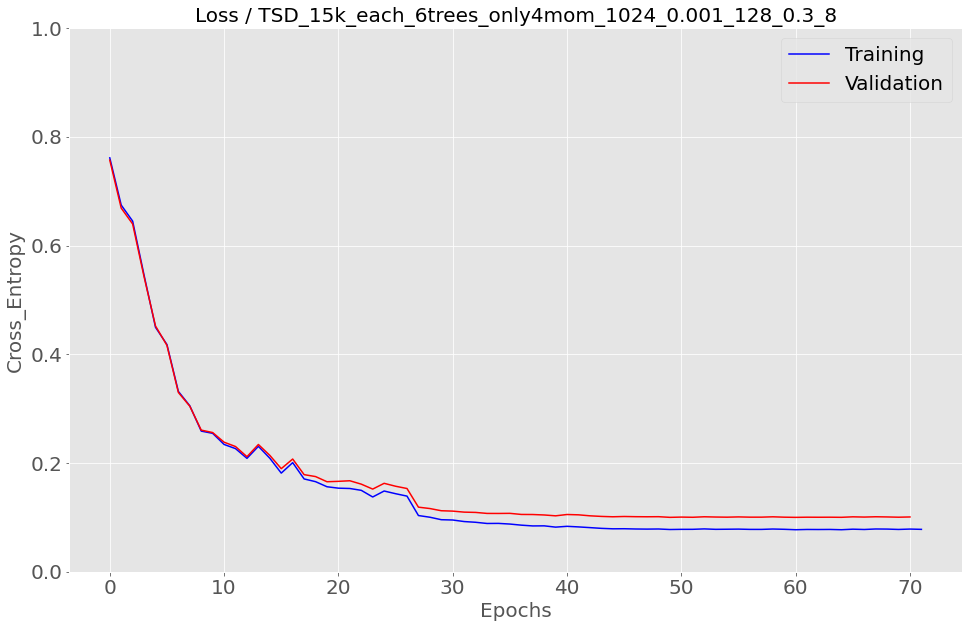

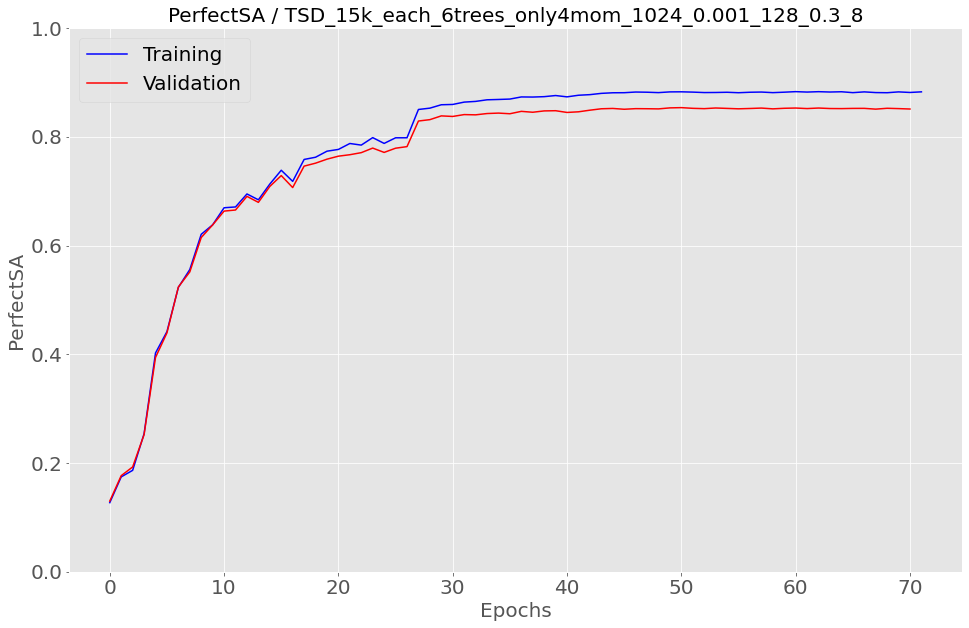

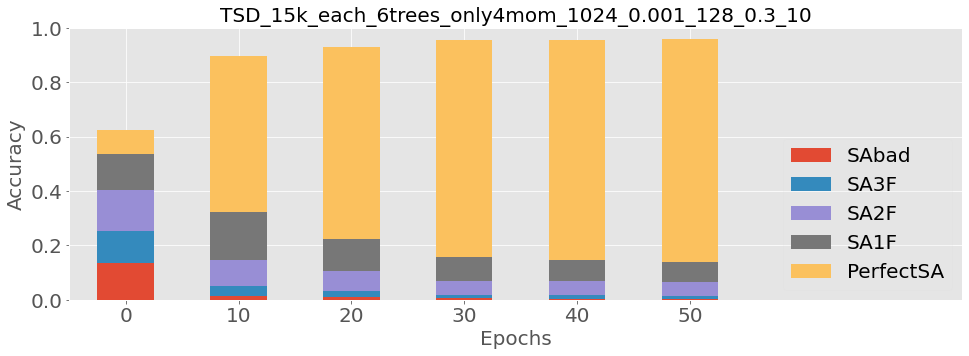

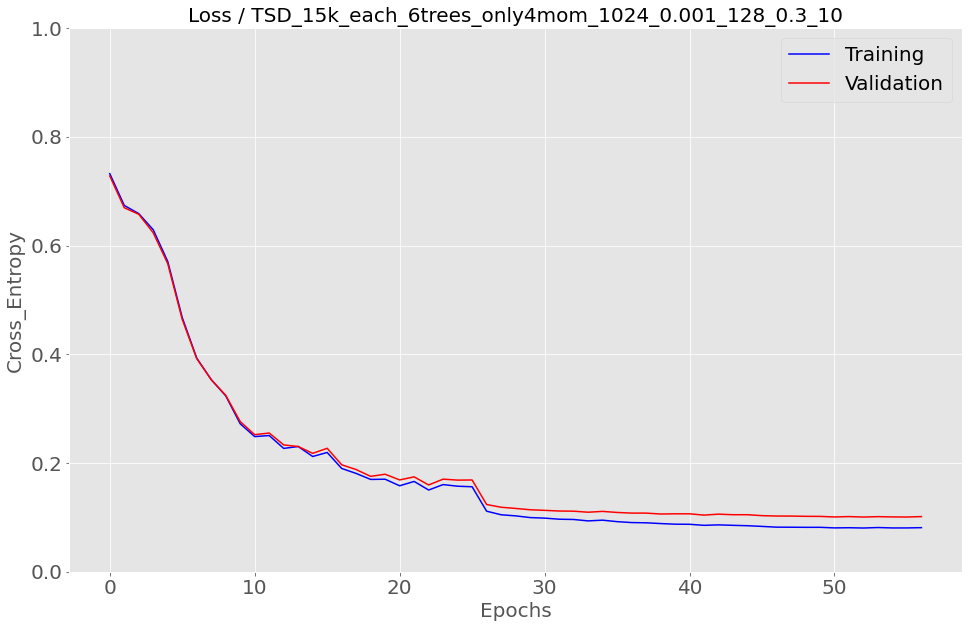

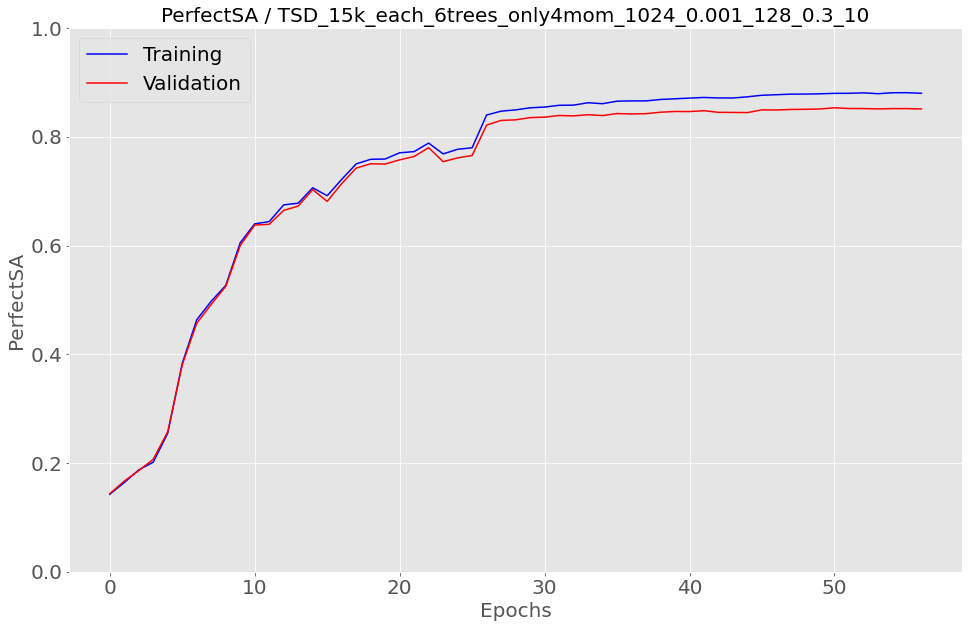

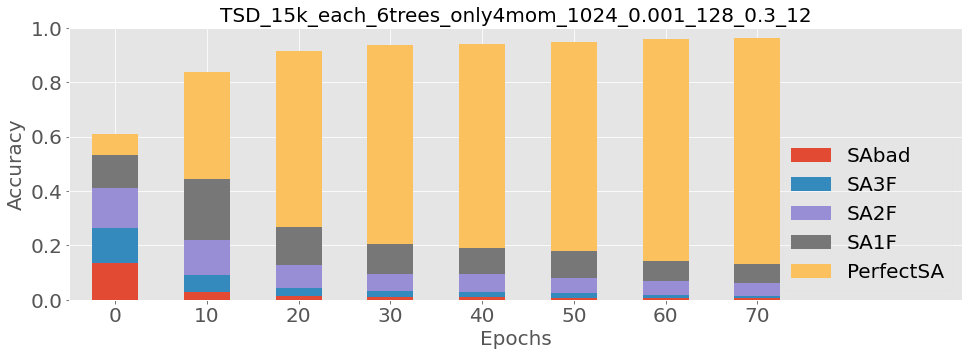

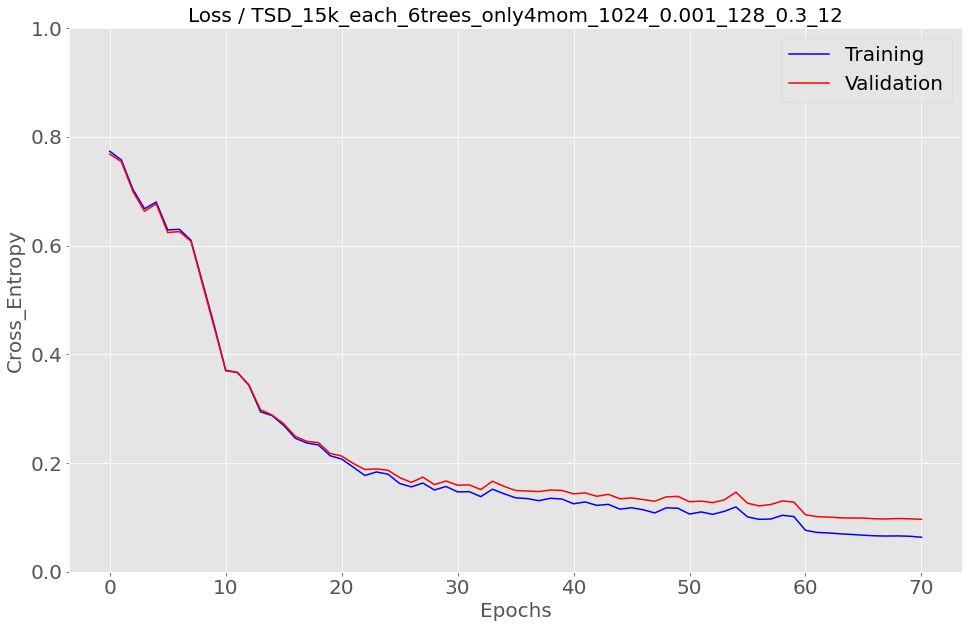

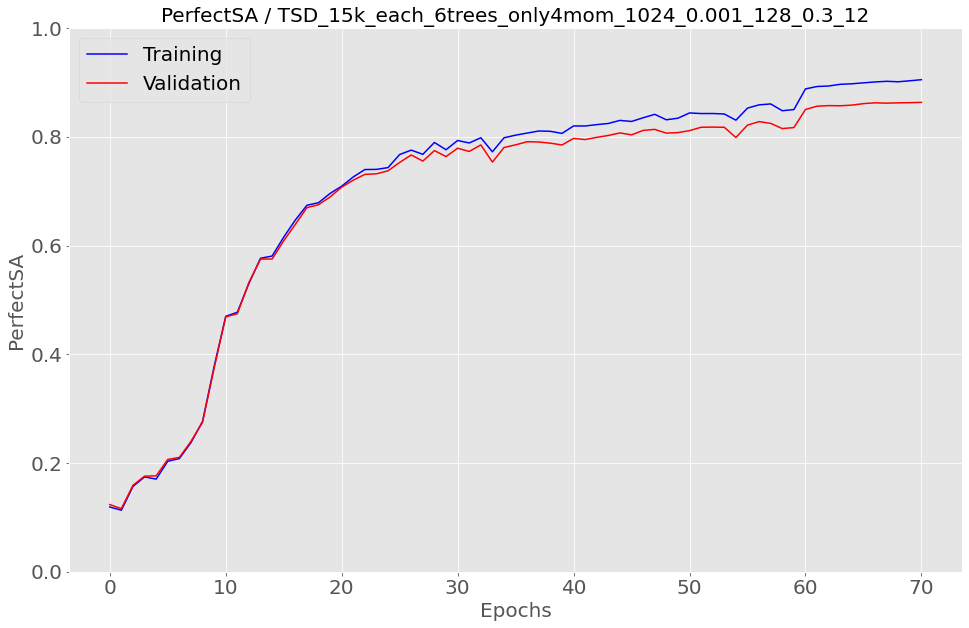

In [3]:
names = []
perfSA = []
SA_1F = []
SA_2F = []
SA_3F = []
SA_bad = []
max_acc = []

for data_name in data_names:
    for spec in specs:
        plotname_extension = data_name + '_' + spec
        
        nfs_path = "/nfs/dust/belle2/user/axelheim/BranchSeparator/run_HcX_globTag/"

        plot_path = "/afs/desy.de/user/a/axelheim/private/run_HcX_globTag/"
        
        
        data_dir = Path((nfs_path + 'tb_logs/' + data_name + '/' + spec))
        
        csv_dir = Path((nfs_path + 'tb_csv/' + data_name + '/' + spec))
        csv_dir.mkdir(parents=True, exist_ok=True)

        plot_path = Path((plot_path + 'plots/' + data_name + '/' + spec))
        plot_path.mkdir(parents=True, exist_ok=True)

        tb_metrics = tabulate_metrics(data_dir, csv_dir)

        
        # choosing the tb_log with the most epochs recorded
        epochs = []
        for i in range(len(tb_metrics)):
            epochs.append(len(tb_metrics[i]))
            print(epochs[i])
            
        most_epochs_idx = 0
        if len(tb_metrics) > 1:
            most_epochs_idx = epochs.index(max(epochs))
        
        print(most_epochs_idx)
        print(len(tb_metrics))
        longest_run = tb_metrics[most_epochs_idx]
        
        
        # the actual plots
        # bar plot
        steps = math.ceil(len(longest_run)/10)
        steps = int(math.ceil(steps / 5.0)) * 5
        multi_metric_bar_plot(longest_run, plot_path, ('barplot_metrics_' + plotname_extension), data_type="Validation", step=steps, metric_type="SA", title=plotname_extension)
        
        
        # loss plot
        loss_tr = longest_run['Cross Entropy/Training']
        loss_val = longest_run['Cross Entropy/Validation']
        curve_plot(loss_tr, loss_val, plot_path, ('loss_comparison_' + plotname_extension), 'Cross_Entropy', ('Loss / ' + plotname_extension))

        # perfect SA plot
        pLCA_tr = longest_run['PerfectSA/Training']
        pLCA_val = longest_run['PerfectSA/Validation']
        curve_plot(pLCA_tr, pLCA_val, plot_path, ('perfectSA_comparison_' + plotname_extension), 'PerfectSA', ('PerfectSA / ' + plotname_extension))
        
        
        
        names.append(plotname_extension)
        
        acc_all = longest_run["Accuracy/Validation"]
        idxmax = acc_all.idxmax()
        max_acc.append(acc_all[idxmax])
        perfSA.append(pLCA_val[idxmax])
        SA_1F.append(longest_run["SA1F/Validation"][idxmax])
        SA_2F.append(longest_run["SA2F/Validation"][idxmax])
        SA_3F.append(longest_run["SA3F/Validation"][idxmax])
        SA_bad.append(longest_run["SAbad/Validation"][idxmax])
        
        

In [4]:
names2 = [a[0:] for a in names]
names2

['TSD_15k_each_6trees_IDs_512_0.001_128_0.3_8',
 'TSD_15k_each_6trees_IDs_512_0.001_128_0.3_10',
 'TSD_15k_each_6trees_IDs_512_0.001_128_0.3_12',
 'TSD_15k_each_6trees_IDs_1024_0.001_128_0.3_8',
 'TSD_15k_each_6trees_IDs_1024_0.001_128_0.3_10',
 'TSD_15k_each_6trees_IDs_1024_0.001_128_0.3_12',
 'TSD_15k_each_6trees_charge_512_0.001_128_0.3_8',
 'TSD_15k_each_6trees_charge_512_0.001_128_0.3_10',
 'TSD_15k_each_6trees_charge_512_0.001_128_0.3_12',
 'TSD_15k_each_6trees_charge_1024_0.001_128_0.3_8',
 'TSD_15k_each_6trees_charge_1024_0.001_128_0.3_10',
 'TSD_15k_each_6trees_charge_1024_0.001_128_0.3_12',
 'TSD_15k_each_6trees_IDs_charge_512_0.001_128_0.3_8',
 'TSD_15k_each_6trees_IDs_charge_512_0.001_128_0.3_10',
 'TSD_15k_each_6trees_IDs_charge_512_0.001_128_0.3_12',
 'TSD_15k_each_6trees_IDs_charge_1024_0.001_128_0.3_8',
 'TSD_15k_each_6trees_IDs_charge_1024_0.001_128_0.3_10',
 'TSD_15k_each_6trees_IDs_charge_1024_0.001_128_0.3_12',
 'TSD_15k_each_6trees_only4mom_512_0.001_128_0.3_8',
 '

In [6]:
max_acc2 = [round(a*100,2) for a in max_acc]

#bg_acc2 = [round(a*100,2) for a in bg_acc]
#Bsig_acc2 = [round(a*100,2) for a in Bsig_acc]
#Btag_acc2 = [round(a*100,2) for a in Btag_acc]

perfSA2 = [round(a*100,2) for a in perfSA]
SA_1F2 = [round(a*100,2) for a in SA_1F]
SA_2F2 = [round(a*100,2) for a in SA_2F]
SA_3F2 = [round(a*100,2) for a in SA_3F]
SA_bad2 = [round(a*100,2) for a in SA_bad]

In [7]:
df = pd.DataFrame({"vars":names2, "perfSA":perfSA2,"SA_1F":SA_1F2,"SA_2F":SA_2F2,"SA_3F":SA_3F2,
                   "SA_bad":SA_bad2,"max_acc":max_acc2, 
                   #"bg_acc":bg_acc2, "Bsig_acc": Bsig_acc2, "Btag_acc":Btag_acc2,"epochs":epochs_trained
                  })

In [8]:
##  only Btag - bg
df.sort_values("max_acc", ascending=False)

vars  perfSA  SA_1F  SA_2F  \
15  TSD_15k_each_6trees_IDs_charge_1024_0.001_128_...   93.85   3.83   1.56   
14  TSD_15k_each_6trees_IDs_charge_512_0.001_128_0...   93.71   3.99   1.57   
17  TSD_15k_each_6trees_IDs_charge_1024_0.001_128_...   93.47   3.93   1.78   
9     TSD_15k_each_6trees_charge_1024_0.001_128_0.3_8   93.15   4.19   1.71   
12  TSD_15k_each_6trees_IDs_charge_512_0.001_128_0...   92.41   4.72   2.00   
16  TSD_15k_each_6trees_IDs_charge_1024_0.001_128_...   89.84   5.71   2.99   
23  TSD_15k_each_6trees_only4mom_1024_0.001_128_0....   86.35   7.14   4.94   
10   TSD_15k_each_6trees_charge_1024_0.001_128_0.3_10   86.18   7.16   4.91   
4       TSD_15k_each_6trees_IDs_1024_0.001_128_0.3_10   86.16   7.15   4.96   
21  TSD_15k_each_6trees_only4mom_1024_0.001_128_0.3_8   85.31   8.21   4.90   
22  TSD_15k_each_6trees_only4mom_1024_0.001_128_0....   85.22   8.22   4.96   
3        TSD_15k_each_6trees_IDs_1024_0.001_128_0.3_8   85.32   7.48   5.51   
5       TSD_15k_each_6trees_IDs_1024_0.001_128_0.3_12   84.88   8.42   4.85   
11   TSD_15k_each_6trees_charge_1024_0.001_128_0.3_12   84.35   8.68   5.01   
18   TSD_15k_each_6trees_only4mom_512_0.001_128_0.3_8   82.43   9.91   5.68   
19  TSD_15k_each_6trees_only4mom_512_0.001_128_0.3_10   82.00   9.85   5.91   
8     TSD_15k_each_6trees_charge_512_0.001_128_0.3_12   65.91  17.97  10.22   
0         TSD_15k_each_6trees_IDs_512_0.001_128_0.3_8   59.60  22.61  11.48   
13  TSD_15k_each_6trees_IDs_charge_512_0.001_128_0...   54.50  24.46  12.78   
6      TSD_15k_each_6trees_charge_512_0.001_128_0.3_8   50.45  21.98  14.10   
7     TSD_15k_each_6trees_charge_512_0.001_128_0.3_10   42.64  26.99  16.99   
1        TSD_15k_each_6trees_IDs_512_0.001_128_0.3_10   41.17  26.67  18.69   
20  TSD_15k_each_6trees_only4mom_512_0.001_128_0.3_12   28.84  28.05  22.99   
2        TSD_15k_each_6trees_IDs_512_0.001_128_0.3_12   27.68  29.07  22.81   

    SA_3F  SA_bad  max_acc  
15   0.42    0.34    98.35  
14   0.45    0.28    98.35  
17   0.51    0.32    98.23  
9    0.51    0.43    98.12  
12   0.53    0.34    97.99  
16   0.92    0.54    97.13  
23   1.00    0.56    96.19  
10   1.25    0.51    96.08  
4    1.09    0.64    96.06  
21   1.10    0.48    96.04  
22   1.15    0.44    96.01  
3    1.07    0.63    95.85  
5    1.26    0.59    95.83  
11   1.36    0.60    95.66  
18   1.43    0.56    95.24  
19   1.61    0.63    95.03  
8    3.56    2.35    89.87  
0    4.09    2.22    88.45  
13   3.82    4.43    85.98  
6    7.38    6.09    82.98  
7    8.27    5.11    81.41  
1    8.50    4.97    80.98  
20  12.31    7.81    75.38  
2   11.95    8.49    74.87

In [11]:
df.sort_values("max_acc", ascending=False)["vars"][15]

'TSD_15k_each_6trees_IDs_charge_1024_0.001_128_0.3_8'